In [1]:
%matplotlib inline

import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

from random import randint, shuffle
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

##Data Explorer

###- Feature Extraction
#### * object-detection-crowdai dataset
#### * object-dataset

In [2]:
data_crowdai = pd.read_csv('object-detection-crowdai/labels.csv', header=0)
data_crowdai['Path'] = './object-detection-crowdai/'+ data_crowdai['Frame']
data_crowdai = data_crowdai.drop('Preview URL', 1)
data_crowdai = data_crowdai.drop('Frame', 1)
data_crowdai['Label'] = data_crowdai['Label'].str.lower()

data_crowdai.columns = ['xmin', 'ymin', 'xmax', 'ymax', 'Label', 'Path']
data_crowdai.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>xmin</th>
      <th>ymin</th>
      <th>xmax</th>
      <th>ymax</th>
      <th>Label</th>
      <th>Path</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>785</td>
      <td>533</td>
      <td>905</td>
      <td>644</td>
      <td>car</td>
      <td>./object-detection-crowdai/1479498371963069978...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>89</td>
      <td>551</td>
      <td>291</td>
      <td>680</td>
      <td>car</td>
      <td>./object-detection-crowdai/1479498371963069978...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>268</td>
      <td>546</td>
      <td>383</td>
      <td>650</td>
      <td>car</td>
      <td>./object-detection-crowdai/1479498371963069978...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>455</td>
      <td>522</td>
      <td>548</td>
      <td>615</td>
      <td>truck</td>
      <td>./object-detection-crowdai/1479498371963069978...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>548</td>
      <td>522</td>
      <td>625</td>
      <td>605</td>
      <td>truck</td>
      <td>./object-detection-crowdai/1479498371963069978...</td>
    </tr>
  </tbody>
</table>
</div>

In [3]:
print("Number of file : ", len(data_crowdai))
print("Unique lables are", np.unique(data_crowdai['Label']))

print("Number of car : ", (data_crowdai['Label'] == 'car').sum())
print("Number of truck : ", (data_crowdai['Label'] == 'truck').sum())
print("Number of pederstrians : ", (data_crowdai['Label'] == 'pedestrian').sum())

Number of file :  72064
Unique lables are ['car' 'pedestrian' 'truck']
Number of car :  62570
Number of truck :  3819
Number of pederstrians :  5675


In [4]:
name = ['Frame', 'xmin', 'ymin', 'xmax', 'ymax', 'ind', 'Label', 'RM']

data_object = pd.read_csv('object-dataset/labels.csv', delim_whitespace=True, names=name)
data_object['Path'] = './object-dataset/' + data_object['Frame']
data_object = data_object.drop('RM', 1)
data_object = data_object.drop('Frame', 1)
data_object = data_object.drop('ind', 1)

data_object.columns = ['xmin', 'ymin', 'xmax', 'ymax', 'Label', 'Path']
data_object.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>xmin</th>
      <th>ymin</th>
      <th>xmax</th>
      <th>ymax</th>
      <th>Label</th>
      <th>Path</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>950</td>
      <td>574</td>
      <td>1004</td>
      <td>620</td>
      <td>car</td>
      <td>./object-dataset/1478019952686311006.jpg</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1748</td>
      <td>482</td>
      <td>1818</td>
      <td>744</td>
      <td>pedestrian</td>
      <td>./object-dataset/1478019952686311006.jpg</td>
    </tr>
    <tr>
      <th>2</th>
      <td>872</td>
      <td>586</td>
      <td>926</td>
      <td>632</td>
      <td>car</td>
      <td>./object-dataset/1478019953180167674.jpg</td>
    </tr>
    <tr>
      <th>3</th>
      <td>686</td>
      <td>566</td>
      <td>728</td>
      <td>618</td>
      <td>truck</td>
      <td>./object-dataset/1478019953689774621.jpg</td>
    </tr>
    <tr>
      <th>4</th>
      <td>716</td>
      <td>578</td>
      <td>764</td>
      <td>622</td>
      <td>car</td>
      <td>./object-dataset/1478019953689774621.jpg</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
print("Number of file : ", len(data_object))
print("Unique lables are", np.unique(data_object['Label']))

print("Number of car : ", (data_object['Label'] == 'car').sum())
print("Number of truck : ", (data_object['Label'] == 'truck').sum())
print("Number of pederstrians : ", (data_object['Label'] == 'pedestrian').sum())

Number of file :  93086
Unique lables are ['biker' 'car' 'pedestrian' 'trafficLight' 'truck']
Number of car :  60788
Number of truck :  3503
Number of pederstrians :  9866


In [6]:
# Combine each dataset

data_train = pd.concat([data_object, data_object]).reset_index()
data_train = data_train.drop('index', 1)
data_train.columns = ['xmin', 'ymin', 'xmax', 'ymax', 'Label', 'Path']
data_train.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>xmin</th>
      <th>ymin</th>
      <th>xmax</th>
      <th>ymax</th>
      <th>Label</th>
      <th>Path</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>950</td>
      <td>574</td>
      <td>1004</td>
      <td>620</td>
      <td>car</td>
      <td>./object-dataset/1478019952686311006.jpg</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1748</td>
      <td>482</td>
      <td>1818</td>
      <td>744</td>
      <td>pedestrian</td>
      <td>./object-dataset/1478019952686311006.jpg</td>
    </tr>
    <tr>
      <th>2</th>
      <td>872</td>
      <td>586</td>
      <td>926</td>
      <td>632</td>
      <td>car</td>
      <td>./object-dataset/1478019953180167674.jpg</td>
    </tr>
    <tr>
      <th>3</th>
      <td>686</td>
      <td>566</td>
      <td>728</td>
      <td>618</td>
      <td>truck</td>
      <td>./object-dataset/1478019953689774621.jpg</td>
    </tr>
    <tr>
      <th>4</th>
      <td>716</td>
      <td>578</td>
      <td>764</td>
      <td>622</td>
      <td>car</td>
      <td>./object-dataset/1478019953689774621.jpg</td>
    </tr>
  </tbody>
</table>
</div>

In [7]:
# Cross validate to split train and test

train_set, test_set = train_test_split(data_train, test_size = 0.2)

In [8]:
cars_s = data_train[(data_train['Label'] == 'car') | (data_train['Label'] == 'truck')].reset_index()
nocars_s = data_train[(data_train['Label'] != 'car') & (data_train['Label'] != 'truck')].reset_index()

print("Number of examples =", len(data_train)) 
print("Number of car examples =", len(cars_s)) 
print("Number of other examples =", len(nocars_s))

Number of examples = 186172
Number of car examples = 128582
Number of other examples = 57590


In [9]:
# Sampling dataset

cars = []
nocars = []

sample_size = 7000
nocar_sample_size = 5000
# sampling car data in dataset
for i in range(sample_size):
    index = randint(0, len(cars_s)-1)
    image = cv2.imread(cars_s['Path'][index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[cars_s['ymin'][index]:cars_s['ymax'][index], 
                  cars_s['xmin'][index]:cars_s['xmax'][index]]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    cars.append(image)

# sampling not car data in dataset
for i in range(nocar_sample_size):
    index = randint(0, len(nocars_s)-1)
    image = cv2.imread(nocars_s['Path'][index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[nocars_s['ymin'][index]:nocars_s['ymax'][index], 
                  nocars_s['xmin'][index]:nocars_s['xmax'][index]]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    nocars.append(image)

In [10]:
print("Number of car examples =", len(cars)) 
print("Number of no car examples =", len(nocars))

print(np.array(cars_s).shape)
print(np.array(nocars_s).shape)

Number of car examples = 7000
Number of no car examples = 5000
(128582, 7)
(57590, 7)


In [11]:
cars_s_train = train_set[(train_set['Label'] == 'car') | (train_set['Label'] == 'truck')].reset_index()
nocars_s_train = train_set[(data_train['Label'] != 'car') & (train_set['Label'] != 'truck')].reset_index()
cars_s_test = test_set[(test_set['Label'] == 'car') | (test_set['Label'] == 'truck')].reset_index()
nocars_s_test = test_set[(test_set['Label'] != 'car') & (test_set['Label'] != 'truck')].reset_index()

print("Number of train examples =", len(train_set)) 
print("Number of train car examples =", len(cars_s_train)) 
print("Number of train other examples =", len(nocars_s_train))

print("Number of test examples =", len(test_set)) 
print("Number of test car examples =", len(cars_s_test)) 
print("Number of test other examples =", len(nocars_s_test))

Number of train examples = 148937
Number of train car examples = 102989
Number of train other examples = 45948
Number of test examples = 37235
Number of test car examples = 25593
Number of test other examples = 11642


/home/wj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [12]:
cars_train = []
cars_test = []
nocars_train = []
nocars_test = []

sample_train = 8000
sample_test = 2000

# Sample training data
for i in range(sample_train):
    index = randint(0, len(cars_s_train)-1)
    image = cv2.imread(cars_s_train['Path'][index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[cars_s_train['ymin'][index]:cars_s_train['ymax'][index], 
                  cars_s_train['xmin'][index]:cars_s_train['xmax'][index]]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    cars_train.append(image)

for i in range(sample_train):
    index = randint(0, len(nocars_s_train)-1)
    image = cv2.imread(nocars_s_train['Path'][index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[nocars_s_train['ymin'][index]:nocars_s_train['ymax'][index], 
                  nocars_s_train['xmin'][index]:nocars_s_train['xmax'][index]]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    nocars_train.append(image)    

# Sample testing data
for i in range(sample_test):
    index = randint(0, len(cars_s_test)-1)
    image = cv2.imread(cars_s_test['Path'][index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[cars_s_test['ymin'][index]:cars_s_test['ymax'][index], 
                  cars_s_test['xmin'][index]:cars_s_test['xmax'][index]]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    cars_test.append(image)

for i in range(sample_test):
    index = randint(0, len(nocars_s_test)-1)
    image = cv2.imread(nocars_s_test['Path'][index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[nocars_s_test['ymin'][index]:nocars_s_test['ymax'][index], 
                  nocars_s_test['xmin'][index]:nocars_s_test['xmax'][index]]
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    nocars_test.append(image)    
    
# Summaries
print("Number of car train examples =", len(cars_train)) 
print("Number of other train examples =", len(nocars_train)) 
print("Number of car test examples =", len(cars_test)) 
print("Number of other test examples =", len(nocars_test))

In [15]:
print("GTI-vehicles-Far:", len([img for img in os.listdir('OwnCollection/vehicles/Far')]))
print("GTI-vehicles-Left:", len([img for img in os.listdir('OwnCollection/vehicles/Left')]))
print("GTI-vehicles-MiddleClose:", len([img for img in os.listdir('OwnCollection/vehicles/MiddleClose')]))
print("GTI-vehicles-Right:", len([img for img in os.listdir('OwnCollection/vehicles/Right')]))
print("GTI-non-vehicles::", len([img for img in os.listdir('OwnCollection/non-vehicles/Far')]))
print("GTI-non-vehicles/Extras:", len([img for img in os.listdir('OwnCollection/non-vehicles/Left')]))
print("GTI-non-vehicles/Extras:", len([img for img in os.listdir('OwnCollection/non-vehicles/MiddleClose')]))
print("GTI-non-vehicles/Extras:", len([img for img in os.listdir('OwnCollection/non-vehicles/Right')]))

GTI-vehicles-Far: 975
GTI-vehicles-Left: 975
GTI-vehicles-MiddleClose: 500
GTI-vehicles-Right: 975
GTI-non-vehicles:: 975
GTI-non-vehicles/Extras: 975
GTI-non-vehicles/Extras: 975
GTI-non-vehicles/Extras: 975


In [11]:
files = glob.glob("OwnCollection/vehicles/Far/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars.append(image)

files = glob.glob("OwnCollection/vehicles/Left/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars.append(image)

files = glob.glob("OwnCollection/vehicles/MiddleClose/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars.append(image)
    
files = glob.glob("OwnCollection/vehicles/Right/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars.append(image)
    
# notcars
files = glob.glob("OwnCollection/non-vehicles/Far/*.png")
shuffle(files)
for i in range(600):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars.append(image)

files = glob.glob("OwnCollection/non-vehicles/Left/*.png")
shuffle(files)
for i in range(600):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars.append(image)

files = glob.glob("OwnCollection/non-vehicles/MiddleClose/*.png")
shuffle(files)
for i in range(600):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars.append(image)
    
files = glob.glob("OwnCollection/non-vehicles/Right/*.png")
shuffle(files)
for i in range(600):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars.append(image)

# Summaries    
print("Number of car examples =", len(cars)) 
print("Number of nocar examples =", len(nocars))

Number of car examples = 7400
Number of nocar examples = 7400


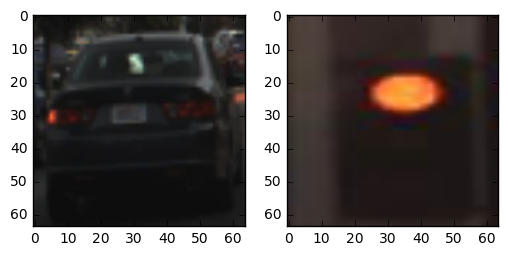

In [12]:
#look few imgaes
plt.subplot(1, 2, 1)
plt.imshow(cars[200])  
plt.subplot(1, 2, 2)
plt.imshow(nocars[99])

In [19]:
# Sample and append to cars_train and nocars_train

files = glob.glob("OwnCollection/vehicles/Far/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars_train.append(image)

files = glob.glob("OwnCollection/vehicles/Left/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars_train.append(image)

files = glob.glob("OwnCollection/vehicles/MiddleClose/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars_train.append(image)
    
files = glob.glob("OwnCollection/vehicles/Right/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cars_train.append(image)
    
# notcars
files = glob.glob("OwnCollection/non-vehicles/Far/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars_train.append(image)

files = glob.glob("OwnCollection/non-vehicles/Left/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars_train.append(image)

files = glob.glob("OwnCollection/non-vehicles/MiddleClose/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars_train.append(image)
    
files = glob.glob("OwnCollection/non-vehicles/Right/*.png")
shuffle(files)
for i in range(100):
    image = cv2.imread(files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    nocars_train.append(image)

# Summaries
print("Number of car train examples =", len(cars_train)) 
print("Number of other train examples =", len(nocars_train)) 
print("Number of car test examples =", len(cars_test)) 
print("Number of other test examples =", len(nocars_test)) 

del data_crowdai, data_object, cars_s_train, cars_s_test, nocars_s_train, nocars_s_test

Number of car train examples = 8400
Number of other train examples = 8400
Number of car test examples = 2000
Number of other test examples = 2000


In [52]:
import os.path
import pickle

# Save the data using python pickle
pickle_file = 'vehicle_detection_data.p'
if not os.path.isfile(pickle_file):
    print('Saving data')
    try:
        with open('vehicle_detection_data.p', 'wb') as pfile:
            pickle.dump(
                {
                    'cars_train': cars_train,
                    'nocars_train': nocars_train,
                    'cars_test': cars_test,
                    'nocars_test': nocars_test,
                    'cars': cars,
                    'nocars': nocars,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Error : ', e)
        raise

print('Data save in successfully')

Saving data
Data save in successfully


In [2]:
import pickle
pickle_file = 'vehicle_detection_data.p'

with open(pickle_file, 'rb') as f:
    data = pickle.load(f)
    cars_train = data['cars_train']
    nocars_train = data['nocars_train']
    cars_test = data['cars_test']
    nocars_test = data['nocars_test']
    cars = data['cars']
    nocars = data['nocars']
    del data
    
print("Number of car train examples =", len(cars_train)) 
print("Number of other train examples =", len(nocars_train)) 
print("Number of car test examples =", len(cars_test)) 
print("Number of other test examples =", len(nocars_test))

print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

Number of car train examples = 8400
Number of other train examples = 8400
Number of car test examples = 2000
Number of other test examples = 2000
(64, 64, 3)
(64, 64, 3)


In [3]:
#look few images
plt.subplot(2, 2, 1)
plt.imshow(cars_train[878])  
plt.subplot(2, 2, 2)
plt.imshow(nocars_train[10])
plt.subplot(2, 2, 3)
plt.imshow(cars_test[1901])  
plt.subplot(2, 2, 4)
plt.imshow(nocars_test[395])

##Color histogram


(64, 64, 3)
(64, 64, 3)


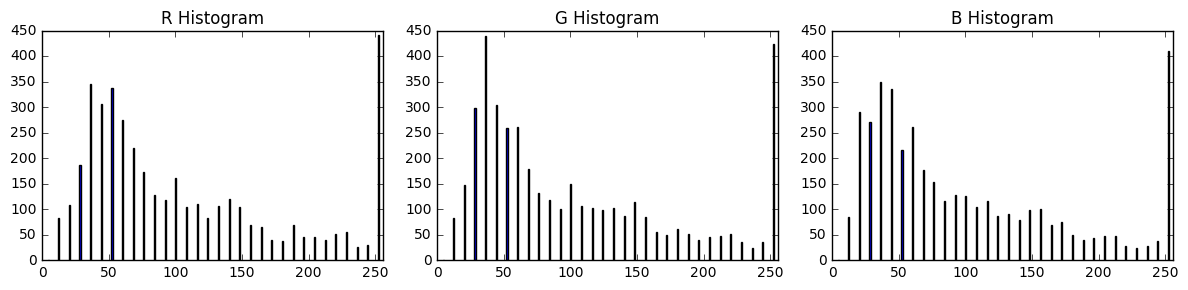

In [4]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:, :, 0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:, :, 1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:, :, 2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features


rh, gh, bh, bincen, feature_vec = color_hist(cars_train[101], nbins=32, bins_range=(0, 256))

fig = plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.bar(bincen, rh[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bincen, gh[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bincen, bh[0])
plt.xlim(0, 256)
plt.title('B Histogram')
fig.tight_layout()

print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

##Explore Color Spaces

(64, 64, 3)
(64, 64, 3)


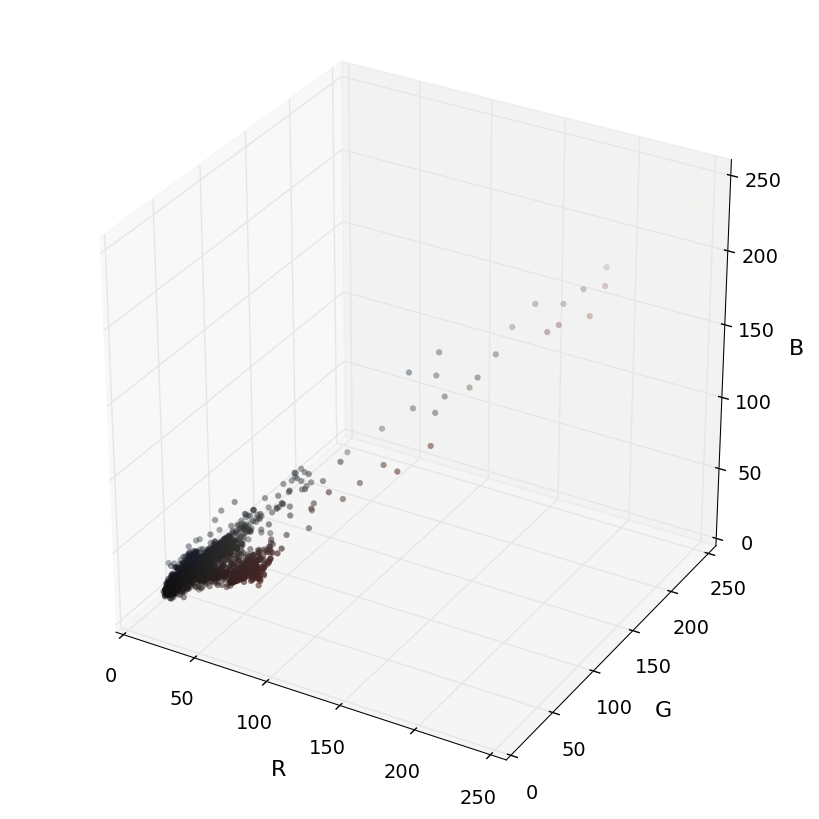

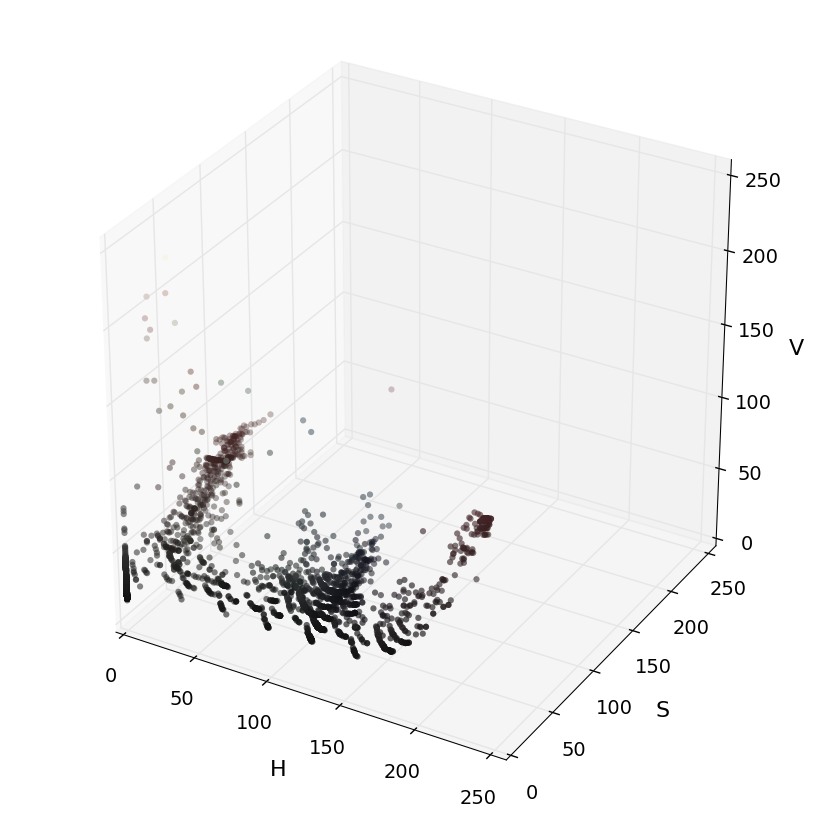

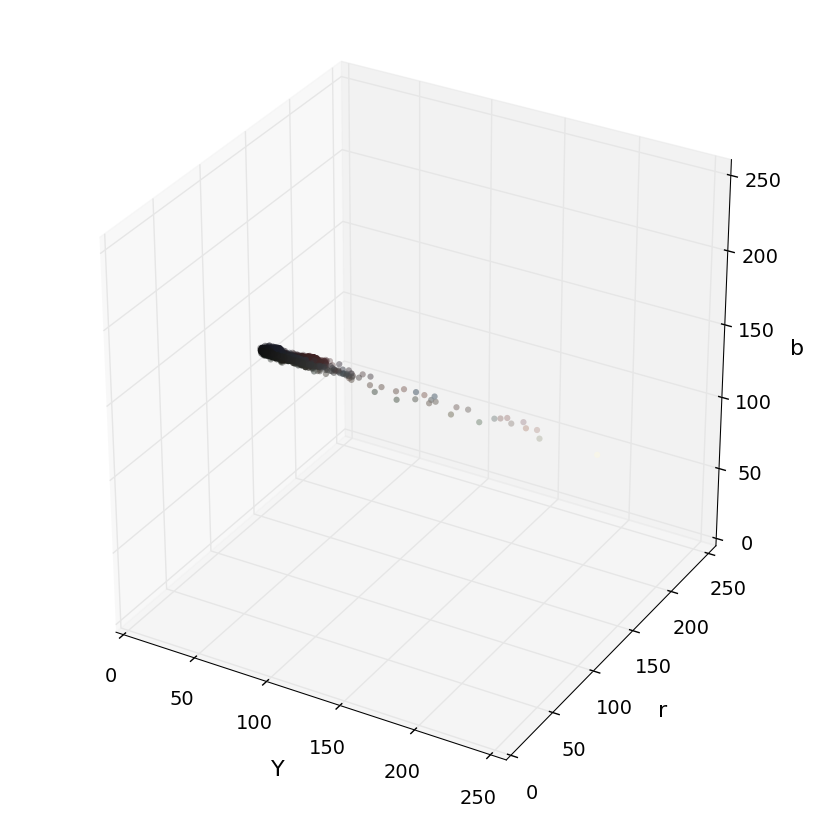

In [5]:
def plot3d(pixels, colors_rgb, axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(pixels[:, :, 0].ravel(), pixels[:, :, 1].ravel(), pixels[:, :, 2].ravel(), 
               c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

# Convert image to desired color space(s)
img_small_RGB = cars_train[23]
img_small_HSV = cv2.cvtColor(img_small_RGB, cv2.COLOR_RGB2HSV)
img_small_YCrCb = cv2.cvtColor(img_small_RGB, cv2.COLOR_RGB2YCrCb)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("Yrb"))

print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

##Spatial binning of color

(3072,)
(64, 64, 3)
(64, 64, 3)


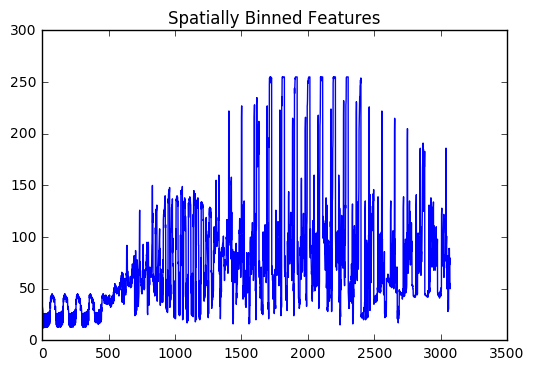

In [6]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

# Check 
features = bin_spatial(cars_train[99], color_space='RGB', size=(32, 32))
print(features.shape)
plt.plot(features)
plt.title('Spatially Binned Features')

print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

##Extracted HOG features

In [7]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        
        return features, hog_image
    
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        
        return features

(64, 64, 3)
(64, 64, 3)


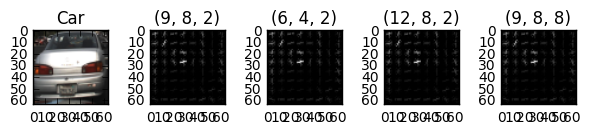

In [8]:
image = cv2.cvtColor(cars_train[1231], cv2.COLOR_RGB2GRAY)

# Define HOG parameters
features, hog_image1 = get_hog_features(image, orient=9, pix_per_cell=8, cell_per_block=2, vis=True, feature_vec=False)
features, hog_image2 = get_hog_features(image, orient=6, pix_per_cell=4, cell_per_block=2, vis=True, feature_vec=False)
features, hog_image3 = get_hog_features(image, orient=10, pix_per_cell=6, cell_per_block=2, vis=True, feature_vec=False)
features, hog_image4 = get_hog_features(image, orient=12, pix_per_cell=8, cell_per_block=2, vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(151)
plt.imshow(cars_train[101])
plt.title('Car')
plt.subplot(152)
plt.imshow(hog_image1, cmap='gray')
plt.title('(9, 8, 2)')
plt.subplot(153)
plt.imshow(hog_image1, cmap='gray')
plt.title('(6, 4, 2)')
plt.subplot(154)
plt.imshow(hog_image1, cmap='gray')
plt.title('(12, 8, 2)')
plt.subplot(155)
plt.imshow(hog_image1, cmap='gray')
plt.title('(9, 8, 8)')
fig.tight_layout()

print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

##Combine and normalize features

In [9]:
# Define a function to compute binned color features 
def bin_spatial(img, size=(32, 32)):
    features = cv2.resize(img, size).ravel()
    return features


# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:, :, 0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:, :, 1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:, :, 2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features


# Define a function to extract features from a list of images
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32), hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel="ALL",
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for image in imgs:
        file_features = []
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else:
            feature_image = np.copy(image)

        # Apply bin_spatial() to get spatial color features
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        # Apply color_hist() also with a color space option now
        if hist_feat == True:
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        # Append the new feature vector to the features list   
        if hog_feat == True:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                         orient, pix_per_cell, cell_per_block,
                                                         vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)
            else:
                hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                                pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    return features

/home/wj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(64, 64, 3)
(64, 64, 3)


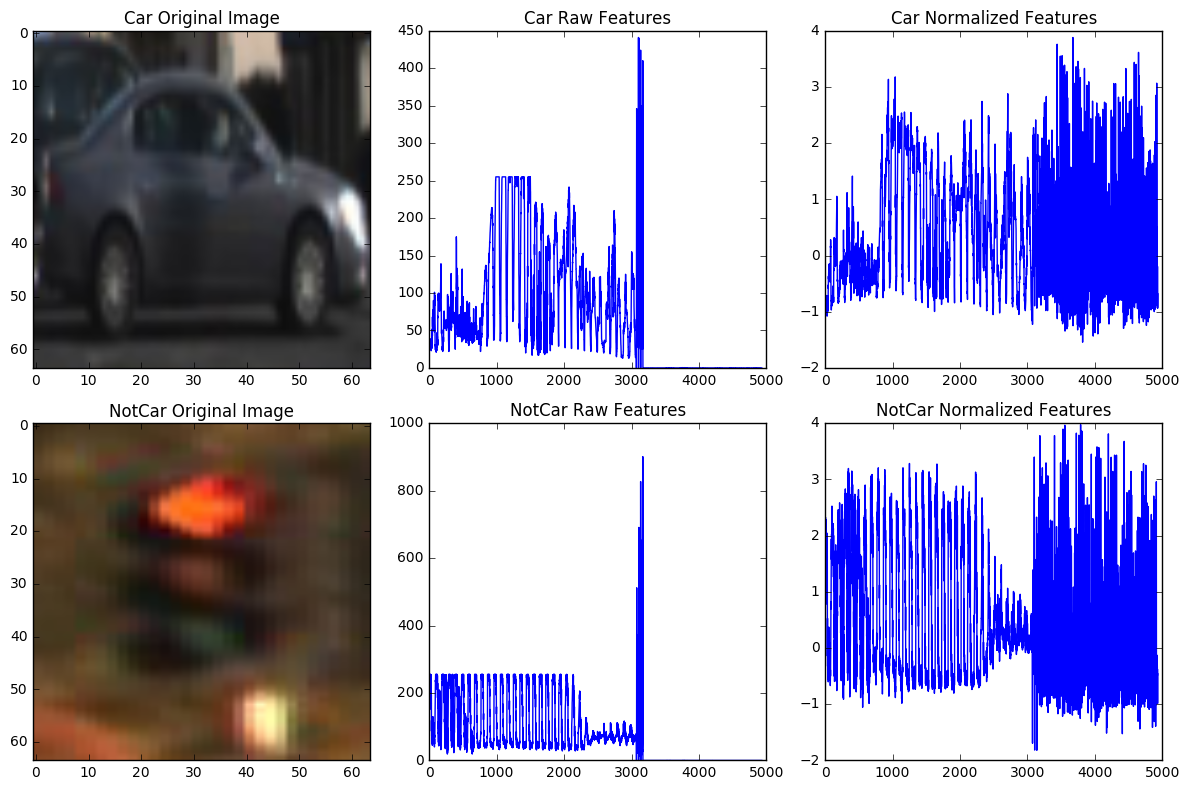

In [10]:
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial = 32
histbin = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "0" # Can be 0, 1, 2, or "ALL"

car_features = extract_features(cars_train[101:110], color_space='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, hog_channel=hog_channel)

nocar_features = extract_features(nocars_train[101:110], color_space='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, hog_channel=hog_channel)

# Create an array stack of feature vectors
X = np.vstack((car_features, nocar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(nocar_features))))

fig = plt.figure(figsize=(12, 8))
# Plot one for car
plt.subplot(231)
plt.imshow(cars_train[90])
plt.title('Car Original Image')
plt.subplot(232)
plt.plot(X[0])
plt.title('Car Raw Features')
plt.subplot(233)
plt.plot(scaled_X[0])
plt.title('Car Normalized Features')

# Plot one for notcar
plt.subplot(234)
plt.imshow(nocars_train[90])
plt.title('NotCar Original Image')
plt.subplot(235)
plt.plot(X[10])
plt.title('NotCar Raw Features')
plt.subplot(236)
plt.plot(scaled_X[10])
plt.title('NotCar Normalized Features')
fig.tight_layout()

print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

##Classifiers

In [11]:
import time
# sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [12]:
print(np.array(cars[101]).shape)
print(np.array(cars_train[101]).shape)

(64, 64, 3)
(64, 64, 3)


In [13]:
#sampling data
# Tune the parameters
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial = 32
histbin = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

car_features = extract_features(cars, color_space=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin, orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, hog_channel=hog_channel)

nocar_features = extract_features(nocars, color_space=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin, orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, hog_channel=hog_channel)

X = np.vstack((car_features, nocar_features)).astype(np.float64)                        
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(nocar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

In [14]:
# Summaries
print("Number of training examples =", len(X_train)) 
print("Number of testing examples =", len(X_test))

Number of training examples = 11840
Number of testing examples = 2960


In [15]:
# Use Neural Net for further testing
#clf = MLPClassifier(verbose=True)
clf = LinearSVC()
t = time.time()
clf.fit(X_train, y_train)
t2 = time.time()
print('Test Accuracy of SVM =', clf.score(X_test, y_test), '; cost =', round(t2-t, 2))

Test Accuracy of SVM = 0.924324324324 ; cost = 35.31


In [27]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [41]:
# Tensorflow
image = []
cars_small = []
nocars_small = []

for img in cars_train:
    cars_small.append(cv2.resize(img, (32, 32)))
for img in nocars_train:
    nocars_small.append(cv2.resize(img, (32, 32)))  
image = np.append(cars_small, nocars_small, axis=0)
image_normalize = image / 255 * 0.8 + 0.1
lable = np.hstack((np.ones(len(cars_train)), np.zeros(len(nocars_train))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(image_normalize, lable, test_size=0.2, random_state=rand_state)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=rand_state)

Model saved


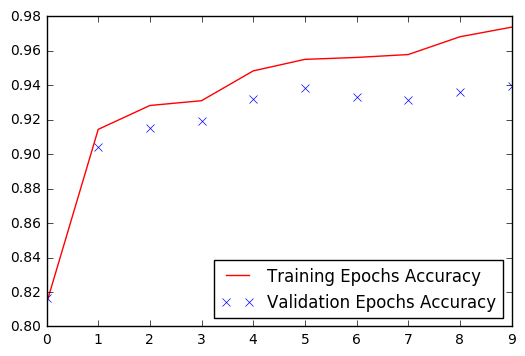

In [42]:
# Features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 2)

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 32
mu = 0
sigma = 0.1
strides = 1
k = 2
rate = 0.001

# Implement LeNet-5
def conv2d(x, W, b, strides):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def LeNet(x):        
    conv1 = conv2d(x, tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)), 
                   tf.Variable(tf.zeros(6)), strides)
    conv1 = maxpool2d(conv1, k)
    conv2 = conv2d(conv1, tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
                   tf.Variable(tf.zeros(16)), strides)
    conv2 = maxpool2d(conv2, k)    
    fc11 = flatten(conv2)
    fc11 = tf.add(tf.matmul(fc11, tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))),
                            tf.Variable(tf.zeros(120)))
    fc11 = tf.nn.relu(fc11)
    fc12 = tf.add(tf.matmul(fc11, tf.Variable(tf.truncated_normal(shape=(120, 32), mean = mu, stddev = sigma))),
                            tf.Variable(tf.zeros(32)))
    fc12 = tf.nn.relu(fc12)
    out = tf.add(tf.matmul(fc12, tf.Variable(tf.truncated_normal(shape=(32, 2), mean = mu, stddev = sigma))),
                           tf.Variable(tf.zeros(2)))
    return out

# Training Pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Model Evaluation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    train_accuracy = []
    validation_accuracy = []
    
    for i in range(EPOCHS):
        X_data, y_data = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_data[offset:end], y_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_accuracy.append(evaluate(X_train, y_train))
        validation_accuracy.append(evaluate(X_validation, y_validation))
        
    saver.save(sess, 'LeNet')
    print("Model saved") 

    plt.plot(range(EPOCHS), train_accuracy, 'r', label='Training Epochs Accuracy')
    plt.plot(range(EPOCHS), validation_accuracy, 'x', label='Validation Epochs Accuracy')
    plt.legend(loc=4)
    plt.show()

In [43]:
# Evaluate the Model on test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy of LeNet = {:.5f}".format(test_accuracy))

Test Accuracy of LeNet = 0.93661


In [55]:
# keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [56]:
train = []
test = []
 
train = np.append(cars_train, nocars_train, axis=0)
train_lable = np.hstack((np.ones(len(cars_train)), np.zeros(len(nocars_train))))
 
test = np.append(cars_test, nocars_test, axis=0)
test_lable = np.hstack((np.ones(len(cars_test)), np.zeros(len(nocars_test)))) 
                
X_test, y_test = test, test_lable
                       
# Split up data into randomized training and validation sets
rand_state = np.random.randint(0, 100)
X_train, X_validation, y_train, y_validation = train_test_split(train, train_lable, 
                                                                test_size=0.2, 
                                                                random_state=rand_state)
# Summaries
print("Number of training examples =", len(X_train), len(y_train)) 
print("Number of validation examples =", len(X_validation), len(y_validation)) 
print("Number of testing examples =", len(X_test), len(y_test))

Number of training examples = 13440 13440
Number of validation examples = 3360 3360
Number of testing examples = 4000 4000


In [58]:
def get_conv(input_shape=(64, 64, 3), filename=None):
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=input_shape, output_shape=input_shape))
    model.add(Convolution2D(10, 3, 3, activation='relu', name='conv1',input_shape=input_shape, border_mode="same"))
    model.add(Convolution2D(10, 3, 3, activation='relu', name='conv2',border_mode="same"))
    model.add(MaxPooling2D(pool_size=(8, 8)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(128, 8, 8,activation="relu",name="dense1")) 
    model.add(Dropout(0.5))
    model.add(Convolution2D(1, 1, 1, name="dense2", activation="tanh"))
    if filename:
        model.load_weights(filename)        
    return model

model = get_conv()
model.add(Flatten())
adam = Adam(lr=.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, nb_epoch=20, verbose=1, validation_data=(X_validation, y_validation))
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save_weights("result.h5")

Train on 13440 samples, validate on 3360 samples
Epoch 1/20


  128/13440 [..............................] - ETA: 27s - loss: 0.4941 - acc: 0.4609

  256/13440 [..............................] - ETA: 14s - loss: 0.3755 - acc: 0.4922

  384/13440 [..............................] - ETA: 10s - loss: 0.3473 - acc: 0.5078

  512/13440 [>.............................] - ETA: 8s - loss: 0.3388 - acc: 0.5098 

  640/13440 [>.............................] - ETA: 7s - loss: 0.3327 - acc: 0.5094

  768/13440 [>.............................] - ETA: 6s - loss: 0.3261 - acc: 0.5091

  896/13440 [=>............................] - ETA: 5s - loss: 0.3126 - acc: 0.5190

 1024/13440 [=>............................] - ETA: 5s - loss: 0.3008 - acc: 0.5312

 1152/13440 [=>............................] - ETA: 4s - loss: 0.2905 - acc: 0.5486

 1280/13440 [=>............................] - ETA: 4s - loss: 0.2808 - acc: 0.5633

 1408/13440 [==>...........................] - ETA: 4s - loss: 0.2763 - acc: 0.5668

 1536/13440 [==>...........................] - ETA: 4s - loss: 0.2736 - acc: 0.5684

 1664/13440 [==>...........................] - ETA: 3s - loss: 0.2701 - acc: 0.5691

 1792/13440 [===>..........................] - ETA: 3s - loss: 0.2643 - acc: 0.5776

 1920/13440 [===>..........................] - ETA: 3s - loss: 0.2604 - acc: 0.5828

 2048/13440 [===>..........................] - ETA: 3s - loss: 0.2552 - acc: 0.5942

 2176/13440 [===>..........................] - ETA: 3s - loss: 0.2505 - acc: 0.6052

 2304/13440 [====>.........................] - ETA: 3s - loss: 0.2469 - acc: 0.6107

 2432/13440 [====>.........................] - ETA: 2s - loss: 0.2441 - acc: 0.6123

 2560/13440 [====>.........................] - ETA: 2s - loss: 0.2414 - acc: 0.6156

 2688/13440 [=====>........................] - ETA: 2s - loss: 0.2374 - acc: 0.6231

 2816/13440 [=====>........................] - ETA: 2s - loss: 0.2346 - acc: 0.6282

 2944/13440 [=====>........................] - ETA: 2s - loss: 0.2318 - acc: 0.6345

 3072/13440 [=====>........................] - ETA: 2s - loss: 0.2291 - acc: 0.6396

 3200/13440 [======>.......................] - ETA: 2s - loss: 0.2256 - acc: 0.6478

 3328/13440 [======>.......................] - ETA: 2s - loss: 0.2234 - acc: 0.6523

 3456/13440 [======>.......................] - ETA: 2s - loss: 0.2213 - acc: 0.6571

 3584/13440 [=======>......................] - ETA: 2s - loss: 0.2183 - acc: 0.6646

 3712/13440 [=======>......................] - ETA: 2s - loss: 0.2163 - acc: 0.6684

 3840/13440 [=======>......................] - ETA: 2s - loss: 0.2140 - acc: 0.6727

 3968/13440 [=======>......................] - ETA: 2s - loss: 0.2119 - acc: 0.6764

 4096/13440 [========>.....................] - ETA: 2s - loss: 0.2098 - acc: 0.6799

 4224/13440 [========>.....................] - ETA: 2s - loss: 0.2078 - acc: 0.6832

 4352/13440 [========>.....................] - ETA: 2s - loss: 0.2056 - acc: 0.6886

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.2038 - acc: 0.6911

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.2014 - acc: 0.6960

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.2001 - acc: 0.6985

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.1984 - acc: 0.7015

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.1972 - acc: 0.7035

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.1955 - acc: 0.7055

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.1944 - acc: 0.7071

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.1925 - acc: 0.7106

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.1913 - acc: 0.7120

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.1892 - acc: 0.7161

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.1877 - acc: 0.7186

 5888/13440 [============>.................] - ETA: 1s - loss: 0.1858 - acc: 0.7220

 6016/13440 [============>.................] - ETA: 1s - loss: 0.1850 - acc: 0.7229

 6144/13440 [============>.................] - ETA: 1s - loss: 0.1838 - acc: 0.7248

 6272/13440 [=============>................] - ETA: 1s - loss: 0.1828 - acc: 0.7267

 6400/13440 [=============>................] - ETA: 1s - loss: 0.1816 - acc: 0.7278

 6528/13440 [=============>................] - ETA: 1s - loss: 0.1804 - acc: 0.7295

 6656/13440 [=============>................] - ETA: 1s - loss: 0.1790 - acc: 0.7321

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.1778 - acc: 0.7338

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.1765 - acc: 0.7363

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.1748 - acc: 0.7395

 7168/13440 [===============>..............] - ETA: 1s - loss: 0.1738 - acc: 0.7416

 7296/13440 [===============>..............] - ETA: 1s - loss: 0.1724 - acc: 0.7444

 7424/13440 [===============>..............] - ETA: 1s - loss: 0.1712 - acc: 0.7466

 7552/13440 [===============>..............] - ETA: 1s - loss: 0.1704 - acc: 0.7481

 7680/13440 [================>.............] - ETA: 1s - loss: 0.1694 - acc: 0.7499

 7808/13440 [================>.............] - ETA: 1s - loss: 0.1682 - acc: 0.7517

 7936/13440 [================>.............] - ETA: 1s - loss: 0.1674 - acc: 0.7537

 8064/13440 [=================>............] - ETA: 1s - loss: 0.1667 - acc: 0.7553

 8192/13440 [=================>............] - ETA: 0s - loss: 0.1658 - acc: 0.7568

 8320/13440 [=================>............] - ETA: 0s - loss: 0.1649 - acc: 0.7585

 8448/13440 [=================>............] - ETA: 0s - loss: 0.1637 - acc: 0.7605

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.1626 - acc: 0.7626

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.1617 - acc: 0.7645

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.1607 - acc: 0.7661

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.1597 - acc: 0.7672

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.1585 - acc: 0.7694

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.1575 - acc: 0.7711

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.1565 - acc: 0.7730

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.1554 - acc: 0.7747

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.1545 - acc: 0.7762

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.1533 - acc: 0.7784

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.1525 - acc: 0.7793

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.1519 - acc: 0.7804

10112/13440 [=====================>........] - ETA: 0s - loss: 0.1510 - acc: 0.7820

10240/13440 [=====================>........] - ETA: 0s - loss: 0.1503 - acc: 0.7831

10368/13440 [======================>.......] - ETA: 0s - loss: 0.1496 - acc: 0.7841

10496/13440 [======================>.......] - ETA: 0s - loss: 0.1492 - acc: 0.7848

10624/13440 [======================>.......] - ETA: 0s - loss: 0.1487 - acc: 0.7855

10752/13440 [=======================>......] - ETA: 0s - loss: 0.1482 - acc: 0.7866

10880/13440 [=======================>......] - ETA: 0s - loss: 0.1475 - acc: 0.7875

11008/13440 [=======================>......] - ETA: 0s - loss: 0.1469 - acc: 0.7886

11136/13440 [=======================>......] - ETA: 0s - loss: 0.1462 - acc: 0.7894

11264/13440 [========================>.....] - ETA: 0s - loss: 0.1458 - acc: 0.7902

11392/13440 [========================>.....] - ETA: 0s - loss: 0.1453 - acc: 0.7911

11520/13440 [========================>.....] - ETA: 0s - loss: 0.1448 - acc: 0.7920

11648/13440 [=========================>....] - ETA: 0s - loss: 0.1445 - acc: 0.7924

11776/13440 [=========================>....] - ETA: 0s - loss: 0.1436 - acc: 0.7938

11904/13440 [=========================>....] - ETA: 0s - loss: 0.1427 - acc: 0.7952

12032/13440 [=========================>....] - ETA: 0s - loss: 0.1423 - acc: 0.7960

12160/13440 [==========================>...] - ETA: 0s - loss: 0.1419 - acc: 0.7969

12288/13440 [==========================>...] - ETA: 0s - loss: 0.1414 - acc: 0.7979

12416/13440 [==========================>...] - ETA: 0s - loss: 0.1409 - acc: 0.7986

12544/13440 [===========================>..] - ETA: 0s - loss: 0.1402 - acc: 0.7999

12672/13440 [===========================>..] - ETA: 0s - loss: 0.1396 - acc: 0.8008

12800/13440 [===========================>..] - ETA: 0s - loss: 0.1389 - acc: 0.8020

12928/13440 [===========================>..] - ETA: 0s - loss: 0.1383 - acc: 0.8030

13056/13440 [============================>.] - ETA: 0s - loss: 0.1375 - acc: 0.8040

13184/13440 [============================>.] - ETA: 0s - loss: 0.1373 - acc: 0.8047

13312/13440 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.8060

13440/13440 [==============================] - 2s - loss: 0.1360 - acc: 0.8069 - val_loss: 0.0777 - val_acc: 0.8988


Epoch 2/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0881 - acc: 0.8906

  256/13440 [..............................] - ETA: 2s - loss: 0.0911 - acc: 0.8711

  384/13440 [..............................] - ETA: 2s - loss: 0.0952 - acc: 0.8646

  512/13440 [>.............................] - ETA: 2s - loss: 0.0889 - acc: 0.8730

  640/13440 [>.............................] - ETA: 1s - loss: 0.0865 - acc: 0.8734

  768/13440 [>.............................] - ETA: 1s - loss: 0.0838 - acc: 0.8789

  896/13440 [=>............................] - ETA: 1s - loss: 0.0797 - acc: 0.8873

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0798 - acc: 0.8867

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0784 - acc: 0.8915

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0779 - acc: 0.8938

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0788 - acc: 0.8942

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0776 - acc: 0.8965

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0765 - acc: 0.8978

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0760 - acc: 0.8979

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0750 - acc: 0.9005

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0760 - acc: 0.8984

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0760 - acc: 0.8975

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0760 - acc: 0.8984

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0751 - acc: 0.9005

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0753 - acc: 0.9004

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0754 - acc: 0.9007

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0756 - acc: 0.9002

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0762 - acc: 0.8988

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0755 - acc: 0.9001

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0764 - acc: 0.8984

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0760 - acc: 0.8984

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0753 - acc: 0.8990

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0763 - acc: 0.8973

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0754 - acc: 0.8979

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0753 - acc: 0.8974

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0757 - acc: 0.8962

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0746 - acc: 0.8979

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0744 - acc: 0.8987

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0739 - acc: 0.8998

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0738 - acc: 0.9004

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0743 - acc: 0.9000

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0744 - acc: 0.8997

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0750 - acc: 0.8995

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0746 - acc: 0.9000

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0744 - acc: 0.9004

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0743 - acc: 0.9005

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0744 - acc: 0.9005

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0744 - acc: 0.8993

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0748 - acc: 0.8990

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0744 - acc: 0.9002

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0745 - acc: 0.9000

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0751 - acc: 0.8989

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0750 - acc: 0.8989

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0750 - acc: 0.8988

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0746 - acc: 0.8997

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0746 - acc: 0.8995

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0741 - acc: 0.9001

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0741 - acc: 0.9002

 6912/13440 [==============>...............] - ETA: 0s - loss: 0.0744 - acc: 0.8996

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0746 - acc: 0.8990

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0745 - acc: 0.8991

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0746 - acc: 0.8993

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0743 - acc: 0.8999

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0743 - acc: 0.8998

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0742 - acc: 0.8999

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0744 - acc: 0.8995

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0741 - acc: 0.8998

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0739 - acc: 0.9002

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0737 - acc: 0.9009

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0734 - acc: 0.9012

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0732 - acc: 0.9012

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0733 - acc: 0.9011

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0734 - acc: 0.9007

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0735 - acc: 0.9006

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0732 - acc: 0.9010

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0729 - acc: 0.9017

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0729 - acc: 0.9018

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0728 - acc: 0.9016

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0724 - acc: 0.9024

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0726 - acc: 0.9023

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0722 - acc: 0.9030

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0723 - acc: 0.9031

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0720 - acc: 0.9032

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0720 - acc: 0.9035

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0722 - acc: 0.9030

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0721 - acc: 0.9029

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0725 - acc: 0.9022

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0724 - acc: 0.9023

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0723 - acc: 0.9023

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0722 - acc: 0.9024

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0719 - acc: 0.9030

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0719 - acc: 0.9029

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0720 - acc: 0.9028

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0721 - acc: 0.9026

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0722 - acc: 0.9023

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0722 - acc: 0.9023

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0722 - acc: 0.9026

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0721 - acc: 0.9028

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0718 - acc: 0.9033

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0717 - acc: 0.9035

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0718 - acc: 0.9034

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0718 - acc: 0.9034

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0716 - acc: 0.9037

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0714 - acc: 0.9038

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0713 - acc: 0.9041

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0712 - acc: 0.9042

13056/13440 [============================>.] - ETA: 0s - loss: 0.0710 - acc: 0.9045

13184/13440 [============================>.] - ETA: 0s - loss: 0.0710 - acc: 0.9044

13312/13440 [============================>.] - ETA: 0s - loss: 0.0707 - acc: 0.9048

13440/13440 [==============================] - 2s - loss: 0.0707 - acc: 0.9048 - val_loss: 0.0616 - val_acc: 0.9202


Epoch 3/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0629 - acc: 0.9219

  256/13440 [..............................] - ETA: 2s - loss: 0.0552 - acc: 0.9336

  384/13440 [..............................] - ETA: 2s - loss: 0.0637 - acc: 0.9219

  512/13440 [>.............................] - ETA: 2s - loss: 0.0669 - acc: 0.9141

  640/13440 [>.............................] - ETA: 2s - loss: 0.0637 - acc: 0.9172

  768/13440 [>.............................] - ETA: 2s - loss: 0.0646 - acc: 0.9141

  896/13440 [=>............................] - ETA: 2s - loss: 0.0655 - acc: 0.9152

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0652 - acc: 0.9160

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0657 - acc: 0.9175

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0681 - acc: 0.9125

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0667 - acc: 0.9134

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0655 - acc: 0.9154

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0640 - acc: 0.9177

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0643 - acc: 0.9163

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0655 - acc: 0.9151

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0658 - acc: 0.9146

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0653 - acc: 0.9150

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0666 - acc: 0.9132

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0667 - acc: 0.9137

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0672 - acc: 0.9121

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0669 - acc: 0.9118

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0654 - acc: 0.9141

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0650 - acc: 0.9154

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0648 - acc: 0.9157

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0648 - acc: 0.9159

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0648 - acc: 0.9162

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0649 - acc: 0.9161

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0652 - acc: 0.9152

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0645 - acc: 0.9162

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0646 - acc: 0.9161

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0638 - acc: 0.9171

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0638 - acc: 0.9170

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0637 - acc: 0.9171

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0635 - acc: 0.9173

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0634 - acc: 0.9176

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0632 - acc: 0.9180

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0634 - acc: 0.9179

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0636 - acc: 0.9182

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0634 - acc: 0.9181

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0641 - acc: 0.9158

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0632 - acc: 0.9173

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0628 - acc: 0.9183

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0626 - acc: 0.9188

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0634 - acc: 0.9174

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0633 - acc: 0.9174

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0629 - acc: 0.9175

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0630 - acc: 0.9167

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0626 - acc: 0.9178

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0624 - acc: 0.9184

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0623 - acc: 0.9184

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0627 - acc: 0.9182

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0628 - acc: 0.9184

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0628 - acc: 0.9185

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0630 - acc: 0.9181

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0633 - acc: 0.9178

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0632 - acc: 0.9178

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0632 - acc: 0.9182

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0629 - acc: 0.9188

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0628 - acc: 0.9191

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0633 - acc: 0.9178

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0631 - acc: 0.9182

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0635 - acc: 0.9180

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0635 - acc: 0.9178

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0633 - acc: 0.9181

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0630 - acc: 0.9186

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0631 - acc: 0.9182

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0632 - acc: 0.9179

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0631 - acc: 0.9176

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0633 - acc: 0.9172

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0634 - acc: 0.9172

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0637 - acc: 0.9168

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0639 - acc: 0.9164

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0639 - acc: 0.9164

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0638 - acc: 0.9166

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0639 - acc: 0.9160

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0639 - acc: 0.9160

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0640 - acc: 0.9160

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0641 - acc: 0.9158

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0637 - acc: 0.9163

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0638 - acc: 0.9163

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0640 - acc: 0.9161

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0641 - acc: 0.9158

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0640 - acc: 0.9159

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0640 - acc: 0.9158

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0642 - acc: 0.9156

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0639 - acc: 0.9158

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0641 - acc: 0.9157

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0640 - acc: 0.9157

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0638 - acc: 0.9159

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0637 - acc: 0.9161

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0636 - acc: 0.9160

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0637 - acc: 0.9159

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0635 - acc: 0.9162

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0633 - acc: 0.9163

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0631 - acc: 0.9167

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0630 - acc: 0.9171

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0629 - acc: 0.9170

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0630 - acc: 0.9169

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0628 - acc: 0.9170

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0626 - acc: 0.9175

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0623 - acc: 0.9178

13056/13440 [============================>.] - ETA: 0s - loss: 0.0622 - acc: 0.9180

13184/13440 [============================>.] - ETA: 0s - loss: 0.0620 - acc: 0.9182

13312/13440 [============================>.] - ETA: 0s - loss: 0.0620 - acc: 0.9183

13440/13440 [==============================] - 2s - loss: 0.0620 - acc: 0.9182 - val_loss: 0.0561 - val_acc: 0.9265


Epoch 4/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0602 - acc: 0.9141

  256/13440 [..............................] - ETA: 2s - loss: 0.0433 - acc: 0.9453

  384/13440 [..............................] - ETA: 2s - loss: 0.0460 - acc: 0.9375

  512/13440 [>.............................] - ETA: 2s - loss: 0.0517 - acc: 0.9277

  640/13440 [>.............................] - ETA: 2s - loss: 0.0553 - acc: 0.9234

  768/13440 [>.............................] - ETA: 1s - loss: 0.0537 - acc: 0.9284

  896/13440 [=>............................] - ETA: 1s - loss: 0.0517 - acc: 0.9319

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0521 - acc: 0.9316

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0526 - acc: 0.9297

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0532 - acc: 0.9273

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0542 - acc: 0.9268

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0535 - acc: 0.9271

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0524 - acc: 0.9279

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0531 - acc: 0.9263

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0524 - acc: 0.9281

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0536 - acc: 0.9268

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0534 - acc: 0.9274

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0539 - acc: 0.9262

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0540 - acc: 0.9268

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0539 - acc: 0.9270

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0535 - acc: 0.9271

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0539 - acc: 0.9268

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0542 - acc: 0.9260

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0539 - acc: 0.9261

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0539 - acc: 0.9256

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0541 - acc: 0.9255

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0542 - acc: 0.9253

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0545 - acc: 0.9249

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0549 - acc: 0.9246

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0550 - acc: 0.9245

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0549 - acc: 0.9244

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0557 - acc: 0.9236

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0549 - acc: 0.9247

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0548 - acc: 0.9251

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0558 - acc: 0.9237

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0563 - acc: 0.9230

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0556 - acc: 0.9240

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0554 - acc: 0.9243

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0554 - acc: 0.9243

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0551 - acc: 0.9250

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0551 - acc: 0.9253

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0549 - acc: 0.9260

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0547 - acc: 0.9262

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0548 - acc: 0.9261

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0543 - acc: 0.9271

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0543 - acc: 0.9270

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0548 - acc: 0.9262

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0544 - acc: 0.9268

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0543 - acc: 0.9273

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0544 - acc: 0.9270

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0542 - acc: 0.9275

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0546 - acc: 0.9268

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0547 - acc: 0.9267

 6912/13440 [==============>...............] - ETA: 0s - loss: 0.0543 - acc: 0.9274

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0544 - acc: 0.9271

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0548 - acc: 0.9268

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0546 - acc: 0.9272

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0544 - acc: 0.9277

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0548 - acc: 0.9273

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0550 - acc: 0.9273

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0548 - acc: 0.9275

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0552 - acc: 0.9270

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0556 - acc: 0.9261

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0558 - acc: 0.9260

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0555 - acc: 0.9263

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0559 - acc: 0.9260

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0560 - acc: 0.9261

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0558 - acc: 0.9265

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0557 - acc: 0.9265

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0559 - acc: 0.9262

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0560 - acc: 0.9261

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0562 - acc: 0.9259

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0565 - acc: 0.9253

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0564 - acc: 0.9259

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0561 - acc: 0.9263

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0562 - acc: 0.9260

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0559 - acc: 0.9261

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0557 - acc: 0.9266

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0558 - acc: 0.9262

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0558 - acc: 0.9263

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0556 - acc: 0.9264

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0557 - acc: 0.9263

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0559 - acc: 0.9260

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0558 - acc: 0.9262

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0556 - acc: 0.9265

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0557 - acc: 0.9261

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0556 - acc: 0.9265

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0557 - acc: 0.9267

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0557 - acc: 0.9270

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0557 - acc: 0.9271

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0554 - acc: 0.9276

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0555 - acc: 0.9276

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0554 - acc: 0.9276

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0555 - acc: 0.9273

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0552 - acc: 0.9278

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0552 - acc: 0.9277

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0548 - acc: 0.9284

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0549 - acc: 0.9282

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0549 - acc: 0.9283

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0551 - acc: 0.9278

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0551 - acc: 0.9278

13056/13440 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9276

13184/13440 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9275

13312/13440 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9277

13440/13440 [==============================] - 2s - loss: 0.0551 - acc: 0.9276 - val_loss: 0.0522 - val_acc: 0.9315


Epoch 5/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0535 - acc: 0.9141

  256/13440 [..............................] - ETA: 2s - loss: 0.0528 - acc: 0.9102

  384/13440 [..............................] - ETA: 2s - loss: 0.0517 - acc: 0.9141

  512/13440 [>.............................] - ETA: 2s - loss: 0.0496 - acc: 0.9199

  640/13440 [>.............................] - ETA: 2s - loss: 0.0478 - acc: 0.9266

  768/13440 [>.............................] - ETA: 2s - loss: 0.0479 - acc: 0.9258

  896/13440 [=>............................] - ETA: 2s - loss: 0.0463 - acc: 0.9286

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0475 - acc: 0.9268

 1152/13440 [=>............................] - ETA: 2s - loss: 0.0469 - acc: 0.9306

 1280/13440 [=>............................] - ETA: 2s - loss: 0.0460 - acc: 0.9344

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0460 - acc: 0.9354

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0467 - acc: 0.9329

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0481 - acc: 0.9321

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0478 - acc: 0.9336

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0481 - acc: 0.9328

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0474 - acc: 0.9326

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0475 - acc: 0.9320

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0486 - acc: 0.9306

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0490 - acc: 0.9301

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0503 - acc: 0.9289

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0515 - acc: 0.9271

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0520 - acc: 0.9261

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0516 - acc: 0.9270

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0527 - acc: 0.9261

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0525 - acc: 0.9259

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0523 - acc: 0.9264

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0516 - acc: 0.9277

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0520 - acc: 0.9275

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0519 - acc: 0.9278

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0525 - acc: 0.9273

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0518 - acc: 0.9284

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0514 - acc: 0.9297

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0508 - acc: 0.9304

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0510 - acc: 0.9301

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0516 - acc: 0.9299

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0517 - acc: 0.9299

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0516 - acc: 0.9301

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0517 - acc: 0.9301

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0514 - acc: 0.9305

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0514 - acc: 0.9311

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0514 - acc: 0.9310

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0513 - acc: 0.9315

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0506 - acc: 0.9322

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0504 - acc: 0.9324

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0504 - acc: 0.9330

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0505 - acc: 0.9326

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0504 - acc: 0.9330

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0504 - acc: 0.9328

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0507 - acc: 0.9321

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0504 - acc: 0.9325

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0505 - acc: 0.9320

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0508 - acc: 0.9316

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0508 - acc: 0.9316

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0507 - acc: 0.9317

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0509 - acc: 0.9317

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0505 - acc: 0.9321

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0502 - acc: 0.9324

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0503 - acc: 0.9324

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0507 - acc: 0.9319

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0506 - acc: 0.9320

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0507 - acc: 0.9316

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0512 - acc: 0.9311

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0510 - acc: 0.9314

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0512 - acc: 0.9312

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0513 - acc: 0.9311

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0512 - acc: 0.9315

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0509 - acc: 0.9320

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0515 - acc: 0.9314

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0517 - acc: 0.9310

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0513 - acc: 0.9317

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0514 - acc: 0.9316

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0517 - acc: 0.9308

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0520 - acc: 0.9299

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0518 - acc: 0.9299

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0516 - acc: 0.9301

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0518 - acc: 0.9300

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0516 - acc: 0.9300

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0517 - acc: 0.9301

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0517 - acc: 0.9302

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0519 - acc: 0.9298

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0518 - acc: 0.9296

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0519 - acc: 0.9295

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0518 - acc: 0.9296

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0520 - acc: 0.9295

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0518 - acc: 0.9299

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0518 - acc: 0.9301

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0517 - acc: 0.9302

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0518 - acc: 0.9302

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0520 - acc: 0.9299

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0517 - acc: 0.9303

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0518 - acc: 0.9301

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0517 - acc: 0.9303

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0516 - acc: 0.9304

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0516 - acc: 0.9304

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0518 - acc: 0.9303

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0516 - acc: 0.9307

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0515 - acc: 0.9310

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0515 - acc: 0.9310

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0515 - acc: 0.9310

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0513 - acc: 0.9315

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0513 - acc: 0.9316

13056/13440 [============================>.] - ETA: 0s - loss: 0.0512 - acc: 0.9317

13184/13440 [============================>.] - ETA: 0s - loss: 0.0511 - acc: 0.9320

13312/13440 [============================>.] - ETA: 0s - loss: 0.0511 - acc: 0.9318

13440/13440 [==============================] - 2s - loss: 0.0512 - acc: 0.9315 - val_loss: 0.0486 - val_acc: 0.9333


Epoch 6/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0700 - acc: 0.9062

  256/13440 [..............................] - ETA: 2s - loss: 0.0680 - acc: 0.9141

  384/13440 [..............................] - ETA: 2s - loss: 0.0598 - acc: 0.9271

  512/13440 [>.............................] - ETA: 2s - loss: 0.0623 - acc: 0.9238

  640/13440 [>.............................] - ETA: 2s - loss: 0.0598 - acc: 0.9266

  768/13440 [>.............................] - ETA: 2s - loss: 0.0578 - acc: 0.9284

  896/13440 [=>............................] - ETA: 2s - loss: 0.0555 - acc: 0.9308

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0541 - acc: 0.9316

 1152/13440 [=>............................] - ETA: 2s - loss: 0.0509 - acc: 0.9366

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0522 - acc: 0.9336

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0526 - acc: 0.9304

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0524 - acc: 0.9303

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0519 - acc: 0.9291

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0531 - acc: 0.9286

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0524 - acc: 0.9292

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0525 - acc: 0.9292

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0540 - acc: 0.9269

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0539 - acc: 0.9271

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0531 - acc: 0.9285

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0523 - acc: 0.9301

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0513 - acc: 0.9319

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0515 - acc: 0.9315

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0514 - acc: 0.9314

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0516 - acc: 0.9320

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0512 - acc: 0.9325

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0516 - acc: 0.9318

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0514 - acc: 0.9320

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0509 - acc: 0.9333

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0512 - acc: 0.9321

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0517 - acc: 0.9315

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0513 - acc: 0.9322

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0510 - acc: 0.9324

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0514 - acc: 0.9318

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0513 - acc: 0.9318

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0520 - acc: 0.9308

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0519 - acc: 0.9303

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0521 - acc: 0.9299

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0520 - acc: 0.9297

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0519 - acc: 0.9301

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0514 - acc: 0.9309

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0514 - acc: 0.9312

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0509 - acc: 0.9323

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0502 - acc: 0.9335

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0503 - acc: 0.9334

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0508 - acc: 0.9328

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0506 - acc: 0.9333

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0507 - acc: 0.9328

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0503 - acc: 0.9333

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0502 - acc: 0.9337

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0498 - acc: 0.9342

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0498 - acc: 0.9341

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0500 - acc: 0.9340

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0501 - acc: 0.9341

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0500 - acc: 0.9340

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0502 - acc: 0.9335

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0502 - acc: 0.9333

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0498 - acc: 0.9339

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0497 - acc: 0.9337

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0495 - acc: 0.9342

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0490 - acc: 0.9349

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0494 - acc: 0.9342

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0489 - acc: 0.9349

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0494 - acc: 0.9343

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0495 - acc: 0.9340

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0494 - acc: 0.9343

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0492 - acc: 0.9344

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0492 - acc: 0.9345

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0489 - acc: 0.9350

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0487 - acc: 0.9355

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0487 - acc: 0.9352

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0487 - acc: 0.9351

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0487 - acc: 0.9352

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0487 - acc: 0.9353

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0486 - acc: 0.9355

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0485 - acc: 0.9357

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0485 - acc: 0.9359

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0485 - acc: 0.9361

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0483 - acc: 0.9363

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0484 - acc: 0.9362

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0482 - acc: 0.9367

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0480 - acc: 0.9368

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0479 - acc: 0.9370

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0482 - acc: 0.9366

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0483 - acc: 0.9364

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0482 - acc: 0.9366

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0480 - acc: 0.9369

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0480 - acc: 0.9369

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0481 - acc: 0.9367

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0482 - acc: 0.9364

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0483 - acc: 0.9361

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0482 - acc: 0.9360

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0481 - acc: 0.9361

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0480 - acc: 0.9362

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0479 - acc: 0.9364

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9364

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9365

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0480 - acc: 0.9363

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0480 - acc: 0.9363

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0481 - acc: 0.9362

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0481 - acc: 0.9359

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0480 - acc: 0.9363

13056/13440 [============================>.] - ETA: 0s - loss: 0.0480 - acc: 0.9362

13184/13440 [============================>.] - ETA: 0s - loss: 0.0479 - acc: 0.9364

13312/13440 [============================>.] - ETA: 0s - loss: 0.0480 - acc: 0.9361

13440/13440 [==============================] - 2s - loss: 0.0480 - acc: 0.9360 - val_loss: 0.0498 - val_acc: 0.9381


Epoch 7/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0398 - acc: 0.9375

  256/13440 [..............................] - ETA: 2s - loss: 0.0438 - acc: 0.9414

  384/13440 [..............................] - ETA: 2s - loss: 0.0444 - acc: 0.9427

  512/13440 [>.............................] - ETA: 2s - loss: 0.0432 - acc: 0.9473

  640/13440 [>.............................] - ETA: 1s - loss: 0.0466 - acc: 0.9422

  768/13440 [>.............................] - ETA: 1s - loss: 0.0444 - acc: 0.9466

  896/13440 [=>............................] - ETA: 1s - loss: 0.0454 - acc: 0.9431

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0481 - acc: 0.9404

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0472 - acc: 0.9401

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0471 - acc: 0.9406

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0477 - acc: 0.9389

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0475 - acc: 0.9395

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0486 - acc: 0.9375

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0472 - acc: 0.9397

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0479 - acc: 0.9380

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0467 - acc: 0.9404

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0456 - acc: 0.9426

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0447 - acc: 0.9431

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0453 - acc: 0.9433

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0444 - acc: 0.9445

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0437 - acc: 0.9457

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0431 - acc: 0.9467

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0427 - acc: 0.9477

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0427 - acc: 0.9479

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0426 - acc: 0.9481

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0438 - acc: 0.9465

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0438 - acc: 0.9470

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0441 - acc: 0.9461

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0441 - acc: 0.9456

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0446 - acc: 0.9443

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0444 - acc: 0.9451

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0439 - acc: 0.9458

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0438 - acc: 0.9453

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0440 - acc: 0.9451

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0440 - acc: 0.9451

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0447 - acc: 0.9436

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0448 - acc: 0.9432

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0446 - acc: 0.9435

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0440 - acc: 0.9441

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0436 - acc: 0.9447

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0439 - acc: 0.9444

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0438 - acc: 0.9446

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0436 - acc: 0.9449

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0436 - acc: 0.9450

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0432 - acc: 0.9457

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0429 - acc: 0.9462

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0424 - acc: 0.9466

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0423 - acc: 0.9468

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0422 - acc: 0.9464

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0428 - acc: 0.9458

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0427 - acc: 0.9461

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0429 - acc: 0.9456

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0432 - acc: 0.9452

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0431 - acc: 0.9455

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0435 - acc: 0.9449

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0439 - acc: 0.9446

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0437 - acc: 0.9450

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0436 - acc: 0.9449

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0436 - acc: 0.9450

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0436 - acc: 0.9451

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0437 - acc: 0.9447

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0435 - acc: 0.9451

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0437 - acc: 0.9446

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0438 - acc: 0.9445

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0440 - acc: 0.9445

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0439 - acc: 0.9445

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0439 - acc: 0.9444

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0440 - acc: 0.9443

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0443 - acc: 0.9441

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0445 - acc: 0.9436

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0445 - acc: 0.9436

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0442 - acc: 0.9439

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0442 - acc: 0.9436

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0445 - acc: 0.9432

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0444 - acc: 0.9433

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0443 - acc: 0.9435

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0444 - acc: 0.9435

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0446 - acc: 0.9429

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0446 - acc: 0.9429

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0446 - acc: 0.9430

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0448 - acc: 0.9426

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0446 - acc: 0.9426

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0446 - acc: 0.9426

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0448 - acc: 0.9423

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0452 - acc: 0.9415

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0453 - acc: 0.9414

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0454 - acc: 0.9413

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0454 - acc: 0.9413

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0454 - acc: 0.9414

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0453 - acc: 0.9416

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0453 - acc: 0.9415

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0452 - acc: 0.9420

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0453 - acc: 0.9418

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0455 - acc: 0.9412

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0455 - acc: 0.9412

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0453 - acc: 0.9413

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0454 - acc: 0.9410

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0453 - acc: 0.9411

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0454 - acc: 0.9409

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0453 - acc: 0.9412

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0454 - acc: 0.9411

13056/13440 [============================>.] - ETA: 0s - loss: 0.0454 - acc: 0.9410

13184/13440 [============================>.] - ETA: 0s - loss: 0.0454 - acc: 0.9409

13312/13440 [============================>.] - ETA: 0s - loss: 0.0456 - acc: 0.9404

13440/13440 [==============================] - 2s - loss: 0.0455 - acc: 0.9406 - val_loss: 0.0447 - val_acc: 0.9423


Epoch 8/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0474 - acc: 0.9375

  256/13440 [..............................] - ETA: 2s - loss: 0.0446 - acc: 0.9414

  384/13440 [..............................] - ETA: 2s - loss: 0.0476 - acc: 0.9401

  512/13440 [>.............................] - ETA: 2s - loss: 0.0440 - acc: 0.9434

  640/13440 [>.............................] - ETA: 2s - loss: 0.0410 - acc: 0.9484

  768/13440 [>.............................] - ETA: 2s - loss: 0.0443 - acc: 0.9440

  896/13440 [=>............................] - ETA: 2s - loss: 0.0451 - acc: 0.9408

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0441 - acc: 0.9404

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0433 - acc: 0.9392

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0428 - acc: 0.9406

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0429 - acc: 0.9403

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0428 - acc: 0.9408

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0430 - acc: 0.9411

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0427 - acc: 0.9414

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0409 - acc: 0.9437

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0430 - acc: 0.9399

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0423 - acc: 0.9421

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0431 - acc: 0.9405

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0425 - acc: 0.9416

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0425 - acc: 0.9410

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0437 - acc: 0.9394

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0438 - acc: 0.9393

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0441 - acc: 0.9392

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0442 - acc: 0.9395

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0442 - acc: 0.9400

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0439 - acc: 0.9408

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0438 - acc: 0.9416

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0435 - acc: 0.9425

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0437 - acc: 0.9423

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0431 - acc: 0.9432

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0429 - acc: 0.9433

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0428 - acc: 0.9438

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0424 - acc: 0.9444

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0428 - acc: 0.9439

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0422 - acc: 0.9446

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0425 - acc: 0.9442

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0426 - acc: 0.9436

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0421 - acc: 0.9445

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0421 - acc: 0.9449

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0421 - acc: 0.9449

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0424 - acc: 0.9447

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0419 - acc: 0.9457

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0416 - acc: 0.9459

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0415 - acc: 0.9460

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0414 - acc: 0.9460

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0414 - acc: 0.9460

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0417 - acc: 0.9453

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0416 - acc: 0.9456

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0421 - acc: 0.9448

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0423 - acc: 0.9447

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0424 - acc: 0.9449

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0425 - acc: 0.9450

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0426 - acc: 0.9447

 6912/13440 [==============>...............] - ETA: 0s - loss: 0.0428 - acc: 0.9446

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0429 - acc: 0.9445

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0432 - acc: 0.9441

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0429 - acc: 0.9446

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0430 - acc: 0.9444

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0429 - acc: 0.9448

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0431 - acc: 0.9441

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0430 - acc: 0.9443

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0431 - acc: 0.9442

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0429 - acc: 0.9444

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0429 - acc: 0.9443

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0431 - acc: 0.9444

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0430 - acc: 0.9444

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0432 - acc: 0.9443

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0432 - acc: 0.9442

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0433 - acc: 0.9438

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0430 - acc: 0.9443

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0432 - acc: 0.9441

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0433 - acc: 0.9440

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0432 - acc: 0.9441

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0432 - acc: 0.9439

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0434 - acc: 0.9439

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0432 - acc: 0.9441

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0430 - acc: 0.9443

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0430 - acc: 0.9444

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0430 - acc: 0.9445

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0428 - acc: 0.9446

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0430 - acc: 0.9443

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0432 - acc: 0.9438

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0432 - acc: 0.9437

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0430 - acc: 0.9439

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0430 - acc: 0.9439

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0431 - acc: 0.9435

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0430 - acc: 0.9436

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0434 - acc: 0.9434

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0435 - acc: 0.9431

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0435 - acc: 0.9433

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0439 - acc: 0.9429

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0438 - acc: 0.9432

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0438 - acc: 0.9431

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0438 - acc: 0.9431

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0438 - acc: 0.9429

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0441 - acc: 0.9426

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0439 - acc: 0.9430

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9426

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9426

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9426

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9425

13056/13440 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9426

13184/13440 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9427

13312/13440 [============================>.] - ETA: 0s - loss: 0.0437 - acc: 0.9429

13440/13440 [==============================] - 2s - loss: 0.0435 - acc: 0.9433 - val_loss: 0.0460 - val_acc: 0.9405


Epoch 9/20
  128/13440 [..............................] - ETA: 1s - loss: 0.0472 - acc: 0.9375

  256/13440 [..............................] - ETA: 1s - loss: 0.0444 - acc: 0.9414

  384/13440 [..............................] - ETA: 1s - loss: 0.0442 - acc: 0.9401

  512/13440 [>.............................] - ETA: 1s - loss: 0.0463 - acc: 0.9395

  640/13440 [>.............................] - ETA: 1s - loss: 0.0474 - acc: 0.9344

  768/13440 [>.............................] - ETA: 2s - loss: 0.0449 - acc: 0.9388

  896/13440 [=>............................] - ETA: 1s - loss: 0.0440 - acc: 0.9408

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0457 - acc: 0.9365

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0442 - acc: 0.9384

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0453 - acc: 0.9391

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0470 - acc: 0.9361

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0480 - acc: 0.9362

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0491 - acc: 0.9351

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0492 - acc: 0.9336

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0478 - acc: 0.9359

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0471 - acc: 0.9380

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0466 - acc: 0.9375

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0469 - acc: 0.9375

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0470 - acc: 0.9375

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0467 - acc: 0.9379

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0457 - acc: 0.9397

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0460 - acc: 0.9382

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0455 - acc: 0.9389

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0459 - acc: 0.9388

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0459 - acc: 0.9384

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0460 - acc: 0.9381

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0461 - acc: 0.9381

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0457 - acc: 0.9383

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0452 - acc: 0.9391

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0446 - acc: 0.9398

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0442 - acc: 0.9403

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0437 - acc: 0.9414

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0447 - acc: 0.9401

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0445 - acc: 0.9405

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0442 - acc: 0.9406

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0446 - acc: 0.9403

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0448 - acc: 0.9398

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0450 - acc: 0.9398

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0454 - acc: 0.9393

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0451 - acc: 0.9398

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0446 - acc: 0.9404

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0447 - acc: 0.9399

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0445 - acc: 0.9404

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0444 - acc: 0.9403

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0439 - acc: 0.9411

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0442 - acc: 0.9411

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0439 - acc: 0.9413

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0442 - acc: 0.9408

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0441 - acc: 0.9412

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0441 - acc: 0.9413

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0441 - acc: 0.9412

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0440 - acc: 0.9414

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0435 - acc: 0.9419

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0434 - acc: 0.9423

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0431 - acc: 0.9425

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0431 - acc: 0.9425

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0428 - acc: 0.9430

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0427 - acc: 0.9432

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0425 - acc: 0.9436

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0423 - acc: 0.9441

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0422 - acc: 0.9442

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0420 - acc: 0.9446

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0422 - acc: 0.9441

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0425 - acc: 0.9437

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0424 - acc: 0.9437

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0422 - acc: 0.9442

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0420 - acc: 0.9446

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0419 - acc: 0.9450

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0418 - acc: 0.9450

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0417 - acc: 0.9451

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0419 - acc: 0.9449

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0418 - acc: 0.9449

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0416 - acc: 0.9452

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0416 - acc: 0.9452

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0414 - acc: 0.9455

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0413 - acc: 0.9457

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0417 - acc: 0.9452

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0418 - acc: 0.9450

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0418 - acc: 0.9450

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0418 - acc: 0.9451

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0417 - acc: 0.9452

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0419 - acc: 0.9451

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0419 - acc: 0.9450

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0421 - acc: 0.9444

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0419 - acc: 0.9447

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0419 - acc: 0.9447

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0419 - acc: 0.9448

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0421 - acc: 0.9445

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0420 - acc: 0.9445

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0420 - acc: 0.9444

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0420 - acc: 0.9445

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0421 - acc: 0.9443

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0419 - acc: 0.9446

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0419 - acc: 0.9446

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0418 - acc: 0.9449

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0416 - acc: 0.9453

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0418 - acc: 0.9448

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9448

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0420 - acc: 0.9448

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0420 - acc: 0.9447

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0420 - acc: 0.9448

13056/13440 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9446

13184/13440 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9443

13312/13440 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9443

13440/13440 [==============================] - 2s - loss: 0.0421 - acc: 0.9445 - val_loss: 0.0434 - val_acc: 0.9440


Epoch 10/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0543 - acc: 0.9297

  256/13440 [..............................] - ETA: 2s - loss: 0.0481 - acc: 0.9297

  384/13440 [..............................] - ETA: 2s - loss: 0.0473 - acc: 0.9349

  512/13440 [>.............................] - ETA: 2s - loss: 0.0496 - acc: 0.9316

  640/13440 [>.............................] - ETA: 2s - loss: 0.0469 - acc: 0.9344

  768/13440 [>.............................] - ETA: 2s - loss: 0.0482 - acc: 0.9349

  896/13440 [=>............................] - ETA: 1s - loss: 0.0454 - acc: 0.9386

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0463 - acc: 0.9385

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0460 - acc: 0.9384

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0480 - acc: 0.9367

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0462 - acc: 0.9396

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0447 - acc: 0.9421

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0477 - acc: 0.9381

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0483 - acc: 0.9364

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0483 - acc: 0.9354

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0480 - acc: 0.9355

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0486 - acc: 0.9343

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0474 - acc: 0.9362

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0469 - acc: 0.9371

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0461 - acc: 0.9375

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0462 - acc: 0.9375

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0459 - acc: 0.9382

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0458 - acc: 0.9382

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0452 - acc: 0.9391

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0458 - acc: 0.9381

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0460 - acc: 0.9378

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0454 - acc: 0.9389

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0455 - acc: 0.9389

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0449 - acc: 0.9397

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0452 - acc: 0.9398

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0449 - acc: 0.9403

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0447 - acc: 0.9412

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0450 - acc: 0.9413

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0443 - acc: 0.9423

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0450 - acc: 0.9413

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0444 - acc: 0.9423

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0443 - acc: 0.9426

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0441 - acc: 0.9428

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0439 - acc: 0.9431

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0438 - acc: 0.9432

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0444 - acc: 0.9419

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0440 - acc: 0.9425

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0441 - acc: 0.9426

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0442 - acc: 0.9425

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0444 - acc: 0.9424

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0447 - acc: 0.9421

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0445 - acc: 0.9423

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0442 - acc: 0.9425

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0444 - acc: 0.9424

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0444 - acc: 0.9427

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0449 - acc: 0.9418

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0447 - acc: 0.9420

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0443 - acc: 0.9424

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0445 - acc: 0.9423

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0443 - acc: 0.9428

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0441 - acc: 0.9429

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0443 - acc: 0.9430

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0442 - acc: 0.9430

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0439 - acc: 0.9435

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0439 - acc: 0.9436

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0436 - acc: 0.9440

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0434 - acc: 0.9441

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0434 - acc: 0.9441

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0437 - acc: 0.9435

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0439 - acc: 0.9429

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0439 - acc: 0.9428

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0438 - acc: 0.9429

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0439 - acc: 0.9429

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0439 - acc: 0.9432

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0439 - acc: 0.9432

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0437 - acc: 0.9433

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0433 - acc: 0.9438

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0431 - acc: 0.9439

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0430 - acc: 0.9442

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0428 - acc: 0.9444

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0426 - acc: 0.9448

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0424 - acc: 0.9450

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0424 - acc: 0.9449

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0424 - acc: 0.9450

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0424 - acc: 0.9451

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0423 - acc: 0.9454

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0421 - acc: 0.9457

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0420 - acc: 0.9456

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0419 - acc: 0.9457

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0418 - acc: 0.9458

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0421 - acc: 0.9455

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0420 - acc: 0.9456

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0421 - acc: 0.9455

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0424 - acc: 0.9450

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0427 - acc: 0.9446

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0425 - acc: 0.9446

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0423 - acc: 0.9450

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0421 - acc: 0.9451

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0421 - acc: 0.9451

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0422 - acc: 0.9449

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0421 - acc: 0.9451

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0421 - acc: 0.9452

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0420 - acc: 0.9453

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0423 - acc: 0.9447

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0422 - acc: 0.9450

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0421 - acc: 0.9451

13056/13440 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9451

13184/13440 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9451

13312/13440 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9450

13440/13440 [==============================] - 2s - loss: 0.0420 - acc: 0.9449 - val_loss: 0.0413 - val_acc: 0.9449


Epoch 11/20
  128/13440 [..............................] - ETA: 1s - loss: 0.0339 - acc: 0.9688

  256/13440 [..............................] - ETA: 1s - loss: 0.0294 - acc: 0.9648

  384/13440 [..............................] - ETA: 1s - loss: 0.0246 - acc: 0.9740

  512/13440 [>.............................] - ETA: 1s - loss: 0.0284 - acc: 0.9707

  640/13440 [>.............................] - ETA: 1s - loss: 0.0296 - acc: 0.9672

  768/13440 [>.............................] - ETA: 1s - loss: 0.0297 - acc: 0.9661

  896/13440 [=>............................] - ETA: 1s - loss: 0.0299 - acc: 0.9665

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0309 - acc: 0.9629

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0307 - acc: 0.9627

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0298 - acc: 0.9641

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0312 - acc: 0.9624

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0317 - acc: 0.9616

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0321 - acc: 0.9615

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0309 - acc: 0.9632

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0315 - acc: 0.9615

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0315 - acc: 0.9609

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0307 - acc: 0.9628

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0302 - acc: 0.9635

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0300 - acc: 0.9642

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0303 - acc: 0.9637

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0301 - acc: 0.9639

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0307 - acc: 0.9627

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0312 - acc: 0.9616

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0315 - acc: 0.9613

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0317 - acc: 0.9609

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0325 - acc: 0.9591

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0321 - acc: 0.9601

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0318 - acc: 0.9601

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0321 - acc: 0.9591

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0330 - acc: 0.9576

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0326 - acc: 0.9584

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0326 - acc: 0.9583

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0326 - acc: 0.9581

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0330 - acc: 0.9577

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0329 - acc: 0.9578

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0331 - acc: 0.9575

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0328 - acc: 0.9573

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0331 - acc: 0.9570

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0334 - acc: 0.9571

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0338 - acc: 0.9566

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0344 - acc: 0.9560

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0348 - acc: 0.9555

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0353 - acc: 0.9549

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0357 - acc: 0.9544

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0361 - acc: 0.9540

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0367 - acc: 0.9530

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0367 - acc: 0.9525

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0368 - acc: 0.9521

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0366 - acc: 0.9525

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0366 - acc: 0.9525

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0363 - acc: 0.9531

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0361 - acc: 0.9534

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0360 - acc: 0.9536

 6912/13440 [==============>...............] - ETA: 0s - loss: 0.0358 - acc: 0.9537

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0358 - acc: 0.9538

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0359 - acc: 0.9540

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0358 - acc: 0.9542

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0360 - acc: 0.9541

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0363 - acc: 0.9534

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0366 - acc: 0.9530

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0369 - acc: 0.9525

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0371 - acc: 0.9521

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0376 - acc: 0.9516

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0381 - acc: 0.9508

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0383 - acc: 0.9505

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0385 - acc: 0.9497

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0386 - acc: 0.9497

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0388 - acc: 0.9493

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0387 - acc: 0.9496

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0388 - acc: 0.9492

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0390 - acc: 0.9491

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0395 - acc: 0.9488

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0393 - acc: 0.9491

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0391 - acc: 0.9494

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0389 - acc: 0.9495

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0393 - acc: 0.9490

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0392 - acc: 0.9491

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0395 - acc: 0.9487

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0398 - acc: 0.9483

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0398 - acc: 0.9483

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0398 - acc: 0.9483

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0398 - acc: 0.9482

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0400 - acc: 0.9479

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0400 - acc: 0.9479

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0402 - acc: 0.9475

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0400 - acc: 0.9476

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0402 - acc: 0.9474

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0404 - acc: 0.9470

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0404 - acc: 0.9470

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0404 - acc: 0.9469

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0403 - acc: 0.9470

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0404 - acc: 0.9469

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0405 - acc: 0.9470

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0403 - acc: 0.9472

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0404 - acc: 0.9471

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0404 - acc: 0.9473

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0405 - acc: 0.9470

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9471

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9471

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9473

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9472

13056/13440 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9474

13184/13440 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9474

13312/13440 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9473

13440/13440 [==============================] - 2s - loss: 0.0403 - acc: 0.9474 - val_loss: 0.0402 - val_acc: 0.9464


Epoch 12/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0267 - acc: 0.9609

  256/13440 [..............................] - ETA: 2s - loss: 0.0344 - acc: 0.9531

  384/13440 [..............................] - ETA: 2s - loss: 0.0315 - acc: 0.9583

  512/13440 [>.............................] - ETA: 1s - loss: 0.0318 - acc: 0.9570

  640/13440 [>.............................] - ETA: 1s - loss: 0.0325 - acc: 0.9578

  768/13440 [>.............................] - ETA: 1s - loss: 0.0319 - acc: 0.9570

  896/13440 [=>............................] - ETA: 1s - loss: 0.0307 - acc: 0.9576

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0301 - acc: 0.9600

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0307 - acc: 0.9592

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0317 - acc: 0.9586

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0331 - acc: 0.9560

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0359 - acc: 0.9531

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0378 - acc: 0.9501

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0382 - acc: 0.9503

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0377 - acc: 0.9510

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0369 - acc: 0.9526

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0377 - acc: 0.9513

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0369 - acc: 0.9527

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0372 - acc: 0.9519

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0373 - acc: 0.9516

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0368 - acc: 0.9524

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0370 - acc: 0.9521

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0365 - acc: 0.9528

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0366 - acc: 0.9525

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0369 - acc: 0.9522

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0364 - acc: 0.9531

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0363 - acc: 0.9534

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0356 - acc: 0.9545

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0353 - acc: 0.9550

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0357 - acc: 0.9544

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0359 - acc: 0.9544

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0356 - acc: 0.9546

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0354 - acc: 0.9553

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0350 - acc: 0.9557

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0350 - acc: 0.9558

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0349 - acc: 0.9559

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0348 - acc: 0.9563

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0344 - acc: 0.9570

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0346 - acc: 0.9571

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0348 - acc: 0.9566

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0349 - acc: 0.9562

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0348 - acc: 0.9563

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0348 - acc: 0.9557

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0351 - acc: 0.9553

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0360 - acc: 0.9542

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0363 - acc: 0.9536

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0366 - acc: 0.9531

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0365 - acc: 0.9531

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0369 - acc: 0.9526

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0371 - acc: 0.9525

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0368 - acc: 0.9530

 6656/13440 [=============>................] - ETA: 0s - loss: 0.0369 - acc: 0.9527

 6784/13440 [==============>...............] - ETA: 0s - loss: 0.0369 - acc: 0.9527

 6912/13440 [==============>...............] - ETA: 0s - loss: 0.0371 - acc: 0.9523

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0369 - acc: 0.9526

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0371 - acc: 0.9523

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0372 - acc: 0.9519

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0377 - acc: 0.9511

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0376 - acc: 0.9511

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0377 - acc: 0.9513

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0376 - acc: 0.9515

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0376 - acc: 0.9515

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0373 - acc: 0.9520

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0373 - acc: 0.9521

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0374 - acc: 0.9522

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0374 - acc: 0.9524

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0373 - acc: 0.9524

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0373 - acc: 0.9524

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0371 - acc: 0.9528

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0375 - acc: 0.9523

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0375 - acc: 0.9521

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0376 - acc: 0.9523

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0374 - acc: 0.9525

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0372 - acc: 0.9525

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0373 - acc: 0.9524

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0371 - acc: 0.9526

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0369 - acc: 0.9529

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0369 - acc: 0.9528

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0371 - acc: 0.9525

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0372 - acc: 0.9524

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0372 - acc: 0.9523

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0372 - acc: 0.9524

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0371 - acc: 0.9525

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0373 - acc: 0.9522

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0377 - acc: 0.9517

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0378 - acc: 0.9512

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0379 - acc: 0.9512

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0379 - acc: 0.9513

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0379 - acc: 0.9512

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0381 - acc: 0.9511

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0381 - acc: 0.9509

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0383 - acc: 0.9507

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0382 - acc: 0.9509

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0384 - acc: 0.9504

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0385 - acc: 0.9502

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0385 - acc: 0.9502

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0384 - acc: 0.9503

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0382 - acc: 0.9506

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0383 - acc: 0.9505

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0387 - acc: 0.9499

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0387 - acc: 0.9499

13056/13440 [============================>.] - ETA: 0s - loss: 0.0389 - acc: 0.9496

13184/13440 [============================>.] - ETA: 0s - loss: 0.0388 - acc: 0.9498

13312/13440 [============================>.] - ETA: 0s - loss: 0.0388 - acc: 0.9499

13440/13440 [==============================] - 2s - loss: 0.0387 - acc: 0.9499 - val_loss: 0.0400 - val_acc: 0.9467


Epoch 13/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0279 - acc: 0.9766

  256/13440 [..............................] - ETA: 2s - loss: 0.0336 - acc: 0.9648

  384/13440 [..............................] - ETA: 2s - loss: 0.0311 - acc: 0.9661

  512/13440 [>.............................] - ETA: 2s - loss: 0.0360 - acc: 0.9590

  640/13440 [>.............................] - ETA: 2s - loss: 0.0359 - acc: 0.9578

  768/13440 [>.............................] - ETA: 2s - loss: 0.0364 - acc: 0.9557

  896/13440 [=>............................] - ETA: 1s - loss: 0.0352 - acc: 0.9565

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0347 - acc: 0.9570

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0340 - acc: 0.9575

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0343 - acc: 0.9570

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0358 - acc: 0.9531

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0359 - acc: 0.9531

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0349 - acc: 0.9555

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0350 - acc: 0.9554

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0348 - acc: 0.9552

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0344 - acc: 0.9546

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0343 - acc: 0.9550

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0346 - acc: 0.9549

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0343 - acc: 0.9552

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0344 - acc: 0.9555

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0344 - acc: 0.9557

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0344 - acc: 0.9549

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0346 - acc: 0.9545

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0346 - acc: 0.9541

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0348 - acc: 0.9534

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0347 - acc: 0.9537

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0350 - acc: 0.9534

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0359 - acc: 0.9523

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0371 - acc: 0.9512

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0371 - acc: 0.9516

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0370 - acc: 0.9521

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0372 - acc: 0.9517

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0368 - acc: 0.9524

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0367 - acc: 0.9527

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0370 - acc: 0.9522

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0369 - acc: 0.9527

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0369 - acc: 0.9529

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0373 - acc: 0.9523

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0374 - acc: 0.9521

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0377 - acc: 0.9516

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0371 - acc: 0.9524

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0367 - acc: 0.9528

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0366 - acc: 0.9531

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0360 - acc: 0.9540

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0363 - acc: 0.9531

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0361 - acc: 0.9538

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0363 - acc: 0.9535

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0365 - acc: 0.9528

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0363 - acc: 0.9531

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0364 - acc: 0.9530

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0364 - acc: 0.9530

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0361 - acc: 0.9533

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0359 - acc: 0.9537

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0359 - acc: 0.9537

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0359 - acc: 0.9536

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0358 - acc: 0.9537

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0358 - acc: 0.9537

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0358 - acc: 0.9535

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0357 - acc: 0.9535

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0361 - acc: 0.9531

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0360 - acc: 0.9534

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0358 - acc: 0.9536

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0357 - acc: 0.9539

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0355 - acc: 0.9543

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0355 - acc: 0.9542

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0358 - acc: 0.9536

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0358 - acc: 0.9537

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0359 - acc: 0.9536

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0361 - acc: 0.9534

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0358 - acc: 0.9538

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0359 - acc: 0.9536

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0359 - acc: 0.9533

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0362 - acc: 0.9530

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0361 - acc: 0.9531

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0364 - acc: 0.9527

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0361 - acc: 0.9531

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0359 - acc: 0.9534

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0358 - acc: 0.9535

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0358 - acc: 0.9537

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0356 - acc: 0.9542

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0354 - acc: 0.9543

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0356 - acc: 0.9540

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0358 - acc: 0.9537

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0360 - acc: 0.9535

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0360 - acc: 0.9536

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0358 - acc: 0.9539

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0359 - acc: 0.9538

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0358 - acc: 0.9538

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0358 - acc: 0.9538

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0358 - acc: 0.9539

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0357 - acc: 0.9541

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0357 - acc: 0.9539

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0358 - acc: 0.9536

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0359 - acc: 0.9536

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0359 - acc: 0.9535

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0359 - acc: 0.9533

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0363 - acc: 0.9527

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0363 - acc: 0.9528

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0362 - acc: 0.9530

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0363 - acc: 0.9529

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0364 - acc: 0.9527

13056/13440 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9525

13184/13440 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9526

13312/13440 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9526

13440/13440 [==============================] - 2s - loss: 0.0365 - acc: 0.9526 - val_loss: 0.0384 - val_acc: 0.9494


Epoch 14/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0566 - acc: 0.9297

  256/13440 [..............................] - ETA: 2s - loss: 0.0452 - acc: 0.9492

  384/13440 [..............................] - ETA: 2s - loss: 0.0495 - acc: 0.9401

  512/13440 [>.............................] - ETA: 2s - loss: 0.0442 - acc: 0.9434

  640/13440 [>.............................] - ETA: 2s - loss: 0.0429 - acc: 0.9406

  768/13440 [>.............................] - ETA: 2s - loss: 0.0414 - acc: 0.9414

  896/13440 [=>............................] - ETA: 1s - loss: 0.0397 - acc: 0.9442

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0390 - acc: 0.9473

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0383 - acc: 0.9488

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0414 - acc: 0.9422

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0408 - acc: 0.9439

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0394 - acc: 0.9453

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0388 - acc: 0.9465

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0375 - acc: 0.9481

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0380 - acc: 0.9484

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0380 - acc: 0.9478

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0382 - acc: 0.9472

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0376 - acc: 0.9484

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0376 - acc: 0.9482

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0368 - acc: 0.9496

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0371 - acc: 0.9490

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0371 - acc: 0.9492

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0366 - acc: 0.9504

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0367 - acc: 0.9505

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0368 - acc: 0.9506

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0376 - acc: 0.9492

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0375 - acc: 0.9497

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0372 - acc: 0.9501

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0372 - acc: 0.9504

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0374 - acc: 0.9500

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0372 - acc: 0.9501

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0372 - acc: 0.9502

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0376 - acc: 0.9496

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0378 - acc: 0.9494

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0375 - acc: 0.9502

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0371 - acc: 0.9510

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0369 - acc: 0.9514

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0373 - acc: 0.9515

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0375 - acc: 0.9513

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0375 - acc: 0.9512

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0369 - acc: 0.9524

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0368 - acc: 0.9528

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0373 - acc: 0.9520

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0373 - acc: 0.9521

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0373 - acc: 0.9521

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0373 - acc: 0.9523

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0376 - acc: 0.9518

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0377 - acc: 0.9513

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0376 - acc: 0.9517

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0375 - acc: 0.9517

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0376 - acc: 0.9514

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0375 - acc: 0.9516

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0380 - acc: 0.9514

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0381 - acc: 0.9512

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0382 - acc: 0.9511

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0379 - acc: 0.9516

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0382 - acc: 0.9513

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0381 - acc: 0.9515

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0380 - acc: 0.9515

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0378 - acc: 0.9521

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0375 - acc: 0.9522

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0375 - acc: 0.9522

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0372 - acc: 0.9526

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0369 - acc: 0.9531

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0366 - acc: 0.9537

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0364 - acc: 0.9541

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0364 - acc: 0.9542

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0364 - acc: 0.9540

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0363 - acc: 0.9543

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0363 - acc: 0.9542

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0362 - acc: 0.9543

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0361 - acc: 0.9545

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0360 - acc: 0.9545

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0359 - acc: 0.9548

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0357 - acc: 0.9551

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0355 - acc: 0.9554

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0352 - acc: 0.9558

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0350 - acc: 0.9561

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0350 - acc: 0.9563

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0347 - acc: 0.9566

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0346 - acc: 0.9566

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0350 - acc: 0.9561

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0349 - acc: 0.9562

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0351 - acc: 0.9561

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0350 - acc: 0.9563

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0352 - acc: 0.9561

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0353 - acc: 0.9559

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0354 - acc: 0.9554

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0355 - acc: 0.9554

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0355 - acc: 0.9554

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0356 - acc: 0.9552

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0356 - acc: 0.9552

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0356 - acc: 0.9552

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0356 - acc: 0.9553

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0354 - acc: 0.9556

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0357 - acc: 0.9551

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0359 - acc: 0.9549

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0359 - acc: 0.9550

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0363 - acc: 0.9545

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0366 - acc: 0.9541

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0367 - acc: 0.9539

13056/13440 [============================>.] - ETA: 0s - loss: 0.0367 - acc: 0.9537

13184/13440 [============================>.] - ETA: 0s - loss: 0.0366 - acc: 0.9539

13312/13440 [============================>.] - ETA: 0s - loss: 0.0366 - acc: 0.9538

13440/13440 [==============================] - 2s - loss: 0.0366 - acc: 0.9539 - val_loss: 0.0392 - val_acc: 0.9476


Epoch 15/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0258 - acc: 0.9766

  256/13440 [..............................] - ETA: 2s - loss: 0.0428 - acc: 0.9531

  384/13440 [..............................] - ETA: 2s - loss: 0.0397 - acc: 0.9505

  512/13440 [>.............................] - ETA: 2s - loss: 0.0352 - acc: 0.9570

  640/13440 [>.............................] - ETA: 2s - loss: 0.0315 - acc: 0.9641

  768/13440 [>.............................] - ETA: 2s - loss: 0.0302 - acc: 0.9648

  896/13440 [=>............................] - ETA: 2s - loss: 0.0302 - acc: 0.9643

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0321 - acc: 0.9609

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0314 - acc: 0.9601

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0313 - acc: 0.9617

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0311 - acc: 0.9616

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0308 - acc: 0.9616

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0300 - acc: 0.9627

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0300 - acc: 0.9626

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0315 - acc: 0.9599

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0306 - acc: 0.9609

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0303 - acc: 0.9619

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0307 - acc: 0.9614

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0309 - acc: 0.9613

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0310 - acc: 0.9613

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0309 - acc: 0.9609

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0312 - acc: 0.9609

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0315 - acc: 0.9616

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0317 - acc: 0.9616

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0319 - acc: 0.9609

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0328 - acc: 0.9597

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0324 - acc: 0.9604

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0321 - acc: 0.9607

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0316 - acc: 0.9609

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0314 - acc: 0.9609

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0320 - acc: 0.9602

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0320 - acc: 0.9600

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0317 - acc: 0.9605

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0313 - acc: 0.9609

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0314 - acc: 0.9607

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0315 - acc: 0.9603

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0313 - acc: 0.9609

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0312 - acc: 0.9611

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0320 - acc: 0.9601

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0319 - acc: 0.9604

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0320 - acc: 0.9604

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0323 - acc: 0.9602

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0325 - acc: 0.9600

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0327 - acc: 0.9593

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0328 - acc: 0.9590

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0327 - acc: 0.9591

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0324 - acc: 0.9594

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0327 - acc: 0.9588

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0327 - acc: 0.9587

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0330 - acc: 0.9580

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0329 - acc: 0.9583

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0332 - acc: 0.9578

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0332 - acc: 0.9578

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0333 - acc: 0.9576

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0335 - acc: 0.9577

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0338 - acc: 0.9573

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0339 - acc: 0.9572

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0337 - acc: 0.9576

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0336 - acc: 0.9578

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0337 - acc: 0.9577

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0337 - acc: 0.9576

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0339 - acc: 0.9572

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0338 - acc: 0.9575

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0338 - acc: 0.9574

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0338 - acc: 0.9573

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0337 - acc: 0.9575

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0337 - acc: 0.9573

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0335 - acc: 0.9576

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0335 - acc: 0.9577

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0334 - acc: 0.9576

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0336 - acc: 0.9574

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0335 - acc: 0.9576

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0335 - acc: 0.9575

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0336 - acc: 0.9575

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0337 - acc: 0.9575

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0340 - acc: 0.9571

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0341 - acc: 0.9569

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0341 - acc: 0.9570

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0343 - acc: 0.9568

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0343 - acc: 0.9567

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0343 - acc: 0.9567

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0343 - acc: 0.9566

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0341 - acc: 0.9569

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0341 - acc: 0.9568

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0343 - acc: 0.9566

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0343 - acc: 0.9567

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0340 - acc: 0.9571

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0339 - acc: 0.9573

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0340 - acc: 0.9573

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0340 - acc: 0.9573

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0339 - acc: 0.9575

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0339 - acc: 0.9576

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0339 - acc: 0.9577

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0339 - acc: 0.9575

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0340 - acc: 0.9574

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0342 - acc: 0.9574

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0343 - acc: 0.9572

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0342 - acc: 0.9573

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0342 - acc: 0.9573

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0342 - acc: 0.9573

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0340 - acc: 0.9575

13056/13440 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9575

13184/13440 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9573

13312/13440 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9574

13440/13440 [==============================] - 2s - loss: 0.0342 - acc: 0.9572 - val_loss: 0.0383 - val_acc: 0.9497


Epoch 16/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0425 - acc: 0.9453

  256/13440 [..............................] - ETA: 2s - loss: 0.0330 - acc: 0.9648

  384/13440 [..............................] - ETA: 2s - loss: 0.0376 - acc: 0.9557

  512/13440 [>.............................] - ETA: 2s - loss: 0.0356 - acc: 0.9570

  640/13440 [>.............................] - ETA: 2s - loss: 0.0361 - acc: 0.9547

  768/13440 [>.............................] - ETA: 2s - loss: 0.0343 - acc: 0.9557

  896/13440 [=>............................] - ETA: 2s - loss: 0.0337 - acc: 0.9565

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0352 - acc: 0.9541

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0340 - acc: 0.9557

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0346 - acc: 0.9555

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0343 - acc: 0.9567

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0343 - acc: 0.9564

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0335 - acc: 0.9579

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0328 - acc: 0.9581

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0343 - acc: 0.9563

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0347 - acc: 0.9561

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0336 - acc: 0.9577

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0331 - acc: 0.9588

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0346 - acc: 0.9572

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0351 - acc: 0.9563

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0353 - acc: 0.9557

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0347 - acc: 0.9563

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0344 - acc: 0.9558

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0341 - acc: 0.9564

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0341 - acc: 0.9559

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0344 - acc: 0.9564

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0344 - acc: 0.9560

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0345 - acc: 0.9562

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0348 - acc: 0.9558

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0348 - acc: 0.9557

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0349 - acc: 0.9554

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0359 - acc: 0.9536

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0355 - acc: 0.9538

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0359 - acc: 0.9536

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0361 - acc: 0.9531

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0362 - acc: 0.9533

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0362 - acc: 0.9533

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0356 - acc: 0.9542

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0354 - acc: 0.9541

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0357 - acc: 0.9539

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0357 - acc: 0.9541

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0362 - acc: 0.9537

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0363 - acc: 0.9537

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0363 - acc: 0.9538

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0364 - acc: 0.9535

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0364 - acc: 0.9528

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0360 - acc: 0.9535

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0357 - acc: 0.9539

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0354 - acc: 0.9546

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0354 - acc: 0.9547

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0352 - acc: 0.9550

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0356 - acc: 0.9542

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0355 - acc: 0.9543

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0356 - acc: 0.9546

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0354 - acc: 0.9548

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0353 - acc: 0.9551

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0349 - acc: 0.9557

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0350 - acc: 0.9553

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0351 - acc: 0.9551

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0350 - acc: 0.9552

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0349 - acc: 0.9554

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0348 - acc: 0.9555

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0347 - acc: 0.9556

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0346 - acc: 0.9557

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0352 - acc: 0.9548

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0351 - acc: 0.9550

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0351 - acc: 0.9550

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0354 - acc: 0.9545

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0355 - acc: 0.9545

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0354 - acc: 0.9545

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0352 - acc: 0.9548

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0354 - acc: 0.9544

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0353 - acc: 0.9545

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0352 - acc: 0.9546

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0350 - acc: 0.9548

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0348 - acc: 0.9552

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0350 - acc: 0.9546

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0351 - acc: 0.9543

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0350 - acc: 0.9545

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0351 - acc: 0.9543

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0351 - acc: 0.9543

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0350 - acc: 0.9544

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0350 - acc: 0.9542

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0352 - acc: 0.9540

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0352 - acc: 0.9540

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0351 - acc: 0.9541

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0352 - acc: 0.9539

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0351 - acc: 0.9540

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0351 - acc: 0.9541

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0349 - acc: 0.9544

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0348 - acc: 0.9545

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0347 - acc: 0.9547

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0347 - acc: 0.9548

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0346 - acc: 0.9548

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0346 - acc: 0.9547

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0347 - acc: 0.9546

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0346 - acc: 0.9547

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0344 - acc: 0.9551

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0346 - acc: 0.9549

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0346 - acc: 0.9547

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0345 - acc: 0.9548

13056/13440 [============================>.] - ETA: 0s - loss: 0.0346 - acc: 0.9547

13184/13440 [============================>.] - ETA: 0s - loss: 0.0346 - acc: 0.9548

13312/13440 [============================>.] - ETA: 0s - loss: 0.0346 - acc: 0.9549

13440/13440 [==============================] - 2s - loss: 0.0345 - acc: 0.9551 - val_loss: 0.0363 - val_acc: 0.9533


Epoch 17/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0400 - acc: 0.9453

  256/13440 [..............................] - ETA: 2s - loss: 0.0415 - acc: 0.9453

  384/13440 [..............................] - ETA: 2s - loss: 0.0306 - acc: 0.9609

  512/13440 [>.............................] - ETA: 2s - loss: 0.0346 - acc: 0.9570

  640/13440 [>.............................] - ETA: 2s - loss: 0.0321 - acc: 0.9578

  768/13440 [>.............................] - ETA: 2s - loss: 0.0324 - acc: 0.9596

  896/13440 [=>............................] - ETA: 2s - loss: 0.0315 - acc: 0.9587

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0297 - acc: 0.9609

 1152/13440 [=>............................] - ETA: 2s - loss: 0.0294 - acc: 0.9601

 1280/13440 [=>............................] - ETA: 2s - loss: 0.0298 - acc: 0.9602

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0295 - acc: 0.9624

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0299 - acc: 0.9622

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0290 - acc: 0.9639

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0301 - acc: 0.9615

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0316 - acc: 0.9599

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0314 - acc: 0.9600

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0318 - acc: 0.9591

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0310 - acc: 0.9601

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0311 - acc: 0.9605

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0305 - acc: 0.9621

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0306 - acc: 0.9621

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0308 - acc: 0.9613

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0312 - acc: 0.9609

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0315 - acc: 0.9600

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0316 - acc: 0.9597

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0317 - acc: 0.9594

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0320 - acc: 0.9592

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0319 - acc: 0.9595

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0324 - acc: 0.9588

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0321 - acc: 0.9594

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0332 - acc: 0.9577

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0332 - acc: 0.9575

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0331 - acc: 0.9574

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0328 - acc: 0.9580

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0328 - acc: 0.9583

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0327 - acc: 0.9586

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0331 - acc: 0.9582

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0328 - acc: 0.9587

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0329 - acc: 0.9587

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0331 - acc: 0.9582

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0334 - acc: 0.9581

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0331 - acc: 0.9583

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0334 - acc: 0.9580

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0329 - acc: 0.9585

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0334 - acc: 0.9576

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0337 - acc: 0.9574

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0335 - acc: 0.9576

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0336 - acc: 0.9574

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0340 - acc: 0.9565

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0338 - acc: 0.9567

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0340 - acc: 0.9565

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0340 - acc: 0.9564

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0338 - acc: 0.9570

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0335 - acc: 0.9575

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0331 - acc: 0.9580

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0333 - acc: 0.9576

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0337 - acc: 0.9568

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0336 - acc: 0.9570

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0333 - acc: 0.9574

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0334 - acc: 0.9572

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0335 - acc: 0.9570

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0334 - acc: 0.9572

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0334 - acc: 0.9572

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0336 - acc: 0.9569

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0336 - acc: 0.9572

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0333 - acc: 0.9576

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0333 - acc: 0.9574

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0334 - acc: 0.9574

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0336 - acc: 0.9574

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0336 - acc: 0.9571

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0335 - acc: 0.9575

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0332 - acc: 0.9580

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0332 - acc: 0.9582

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0331 - acc: 0.9583

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0329 - acc: 0.9585

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0328 - acc: 0.9589

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0328 - acc: 0.9589

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0327 - acc: 0.9590

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0325 - acc: 0.9596

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0325 - acc: 0.9595

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0325 - acc: 0.9595

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0325 - acc: 0.9593

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0326 - acc: 0.9592

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0327 - acc: 0.9591

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0328 - acc: 0.9590

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0328 - acc: 0.9587

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0329 - acc: 0.9587

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0327 - acc: 0.9590

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0328 - acc: 0.9587

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0332 - acc: 0.9583

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0334 - acc: 0.9580

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0336 - acc: 0.9579

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0336 - acc: 0.9577

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0336 - acc: 0.9576

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0337 - acc: 0.9575

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0335 - acc: 0.9578

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0335 - acc: 0.9579

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0334 - acc: 0.9579

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0334 - acc: 0.9578

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0334 - acc: 0.9579

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0336 - acc: 0.9575

13056/13440 [============================>.] - ETA: 0s - loss: 0.0337 - acc: 0.9573

13184/13440 [============================>.] - ETA: 0s - loss: 0.0336 - acc: 0.9574

13312/13440 [============================>.] - ETA: 0s - loss: 0.0336 - acc: 0.9573

13440/13440 [==============================] - 2s - loss: 0.0336 - acc: 0.9574 - val_loss: 0.0358 - val_acc: 0.9533


Epoch 18/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0381 - acc: 0.9531

  256/13440 [..............................] - ETA: 2s - loss: 0.0354 - acc: 0.9531

  384/13440 [..............................] - ETA: 2s - loss: 0.0354 - acc: 0.9583

  512/13440 [>.............................] - ETA: 2s - loss: 0.0341 - acc: 0.9590

  640/13440 [>.............................] - ETA: 2s - loss: 0.0319 - acc: 0.9625

  768/13440 [>.............................] - ETA: 2s - loss: 0.0305 - acc: 0.9648

  896/13440 [=>............................] - ETA: 2s - loss: 0.0285 - acc: 0.9665

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0277 - acc: 0.9688

 1152/13440 [=>............................] - ETA: 2s - loss: 0.0312 - acc: 0.9635

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0316 - acc: 0.9625

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0319 - acc: 0.9602

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0326 - acc: 0.9583

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0321 - acc: 0.9597

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0317 - acc: 0.9604

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0312 - acc: 0.9604

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0317 - acc: 0.9600

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0311 - acc: 0.9614

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0308 - acc: 0.9614

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0306 - acc: 0.9622

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0315 - acc: 0.9609

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0326 - acc: 0.9594

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0324 - acc: 0.9595

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0328 - acc: 0.9586

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0325 - acc: 0.9590

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0336 - acc: 0.9572

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0333 - acc: 0.9579

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0328 - acc: 0.9586

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0321 - acc: 0.9595

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0320 - acc: 0.9596

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0318 - acc: 0.9599

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0314 - acc: 0.9604

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0315 - acc: 0.9602

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0315 - acc: 0.9598

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0321 - acc: 0.9591

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0321 - acc: 0.9594

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0317 - acc: 0.9599

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0319 - acc: 0.9597

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0321 - acc: 0.9595

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0319 - acc: 0.9597

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0319 - acc: 0.9594

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0314 - acc: 0.9602

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0318 - acc: 0.9598

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0315 - acc: 0.9604

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0315 - acc: 0.9600

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0312 - acc: 0.9602

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0311 - acc: 0.9604

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0315 - acc: 0.9598

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0314 - acc: 0.9596

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0315 - acc: 0.9597

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0313 - acc: 0.9597

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0312 - acc: 0.9596

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0312 - acc: 0.9596

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0315 - acc: 0.9593

 6912/13440 [==============>...............] - ETA: 0s - loss: 0.0315 - acc: 0.9593

 7040/13440 [==============>...............] - ETA: 0s - loss: 0.0314 - acc: 0.9595

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0311 - acc: 0.9600

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0310 - acc: 0.9601

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0310 - acc: 0.9599

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0313 - acc: 0.9592

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0314 - acc: 0.9591

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0315 - acc: 0.9591

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0313 - acc: 0.9593

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0313 - acc: 0.9593

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0313 - acc: 0.9592

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0312 - acc: 0.9594

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0313 - acc: 0.9593

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0312 - acc: 0.9593

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0314 - acc: 0.9590

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0315 - acc: 0.9589

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0316 - acc: 0.9588

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0316 - acc: 0.9590

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0316 - acc: 0.9589

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0315 - acc: 0.9588

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0317 - acc: 0.9586

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0314 - acc: 0.9591

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0312 - acc: 0.9594

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0310 - acc: 0.9597

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0310 - acc: 0.9597

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0310 - acc: 0.9598

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0310 - acc: 0.9600

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0314 - acc: 0.9594

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0316 - acc: 0.9592

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0318 - acc: 0.9590

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0317 - acc: 0.9592

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0319 - acc: 0.9590

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0319 - acc: 0.9590

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0320 - acc: 0.9589

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0319 - acc: 0.9591

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0317 - acc: 0.9593

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0318 - acc: 0.9591

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0318 - acc: 0.9592

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0318 - acc: 0.9593

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0318 - acc: 0.9593

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0316 - acc: 0.9594

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0317 - acc: 0.9594

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0315 - acc: 0.9596

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0315 - acc: 0.9596

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0313 - acc: 0.9598

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0316 - acc: 0.9596

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0317 - acc: 0.9594

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0318 - acc: 0.9593

13056/13440 [============================>.] - ETA: 0s - loss: 0.0317 - acc: 0.9594

13184/13440 [============================>.] - ETA: 0s - loss: 0.0318 - acc: 0.9593

13312/13440 [============================>.] - ETA: 0s - loss: 0.0317 - acc: 0.9594

13440/13440 [==============================] - 2s - loss: 0.0317 - acc: 0.9594 - val_loss: 0.0337 - val_acc: 0.9557


Epoch 19/20
  128/13440 [..............................] - ETA: 2s - loss: 0.0401 - acc: 0.9609

  256/13440 [..............................] - ETA: 1s - loss: 0.0361 - acc: 0.9609

  384/13440 [..............................] - ETA: 1s - loss: 0.0402 - acc: 0.9531

  512/13440 [>.............................] - ETA: 1s - loss: 0.0388 - acc: 0.9531

  640/13440 [>.............................] - ETA: 2s - loss: 0.0362 - acc: 0.9563

  768/13440 [>.............................] - ETA: 2s - loss: 0.0368 - acc: 0.9531

  896/13440 [=>............................] - ETA: 2s - loss: 0.0350 - acc: 0.9542

 1024/13440 [=>............................] - ETA: 2s - loss: 0.0351 - acc: 0.9541

 1152/13440 [=>............................] - ETA: 2s - loss: 0.0379 - acc: 0.9488

 1280/13440 [=>............................] - ETA: 2s - loss: 0.0369 - acc: 0.9508

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0349 - acc: 0.9538

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0343 - acc: 0.9544

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0345 - acc: 0.9537

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0370 - acc: 0.9509

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0361 - acc: 0.9531

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0349 - acc: 0.9546

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0363 - acc: 0.9536

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0352 - acc: 0.9549

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0348 - acc: 0.9552

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0347 - acc: 0.9559

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0341 - acc: 0.9561

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0334 - acc: 0.9577

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0323 - acc: 0.9592

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0319 - acc: 0.9596

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0315 - acc: 0.9600

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0309 - acc: 0.9612

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0315 - acc: 0.9606

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0325 - acc: 0.9598

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0321 - acc: 0.9604

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0325 - acc: 0.9596

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0322 - acc: 0.9599

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0320 - acc: 0.9602

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0319 - acc: 0.9602

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0319 - acc: 0.9605

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0317 - acc: 0.9605

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0313 - acc: 0.9612

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0312 - acc: 0.9614

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0314 - acc: 0.9611

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0312 - acc: 0.9615

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0316 - acc: 0.9611

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0313 - acc: 0.9615

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0313 - acc: 0.9613

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0313 - acc: 0.9615

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0316 - acc: 0.9611

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0316 - acc: 0.9611

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0312 - acc: 0.9616

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0314 - acc: 0.9613

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0313 - acc: 0.9614

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0316 - acc: 0.9606

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0315 - acc: 0.9608

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0313 - acc: 0.9611

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0311 - acc: 0.9614

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0311 - acc: 0.9612

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0308 - acc: 0.9618

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0306 - acc: 0.9619

 7168/13440 [===============>..............] - ETA: 1s - loss: 0.0307 - acc: 0.9619

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0305 - acc: 0.9620

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0304 - acc: 0.9623

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0304 - acc: 0.9620

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0303 - acc: 0.9622

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0301 - acc: 0.9623

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0304 - acc: 0.9619

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0304 - acc: 0.9619

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0302 - acc: 0.9622

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0305 - acc: 0.9617

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0306 - acc: 0.9616

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0308 - acc: 0.9614

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0310 - acc: 0.9611

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0308 - acc: 0.9612

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0306 - acc: 0.9614

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0306 - acc: 0.9613

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0307 - acc: 0.9609

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0309 - acc: 0.9605

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0309 - acc: 0.9603

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0310 - acc: 0.9602

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0311 - acc: 0.9601

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0309 - acc: 0.9603

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0311 - acc: 0.9600

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0312 - acc: 0.9598

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0309 - acc: 0.9602

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0309 - acc: 0.9600

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0309 - acc: 0.9602

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0307 - acc: 0.9604

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0306 - acc: 0.9605

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0306 - acc: 0.9605

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0307 - acc: 0.9606

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0305 - acc: 0.9608

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0306 - acc: 0.9608

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0305 - acc: 0.9609

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0303 - acc: 0.9611

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0304 - acc: 0.9609

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0302 - acc: 0.9611

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0302 - acc: 0.9612

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0301 - acc: 0.9613

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0301 - acc: 0.9612

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0301 - acc: 0.9613

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0302 - acc: 0.9612

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0302 - acc: 0.9611

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0302 - acc: 0.9612

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0302 - acc: 0.9610

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0303 - acc: 0.9609

13056/13440 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9609

13184/13440 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9609

13312/13440 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9609

13440/13440 [==============================] - 2s - loss: 0.0302 - acc: 0.9609 - val_loss: 0.0352 - val_acc: 0.9542


Epoch 20/20
  128/13440 [..............................] - ETA: 1s - loss: 0.0313 - acc: 0.9688

  256/13440 [..............................] - ETA: 1s - loss: 0.0398 - acc: 0.9570

  384/13440 [..............................] - ETA: 1s - loss: 0.0336 - acc: 0.9635

  512/13440 [>.............................] - ETA: 1s - loss: 0.0320 - acc: 0.9648

  640/13440 [>.............................] - ETA: 1s - loss: 0.0329 - acc: 0.9625

  768/13440 [>.............................] - ETA: 1s - loss: 0.0324 - acc: 0.9635

  896/13440 [=>............................] - ETA: 1s - loss: 0.0328 - acc: 0.9643

 1024/13440 [=>............................] - ETA: 1s - loss: 0.0315 - acc: 0.9648

 1152/13440 [=>............................] - ETA: 1s - loss: 0.0321 - acc: 0.9644

 1280/13440 [=>............................] - ETA: 1s - loss: 0.0322 - acc: 0.9633

 1408/13440 [==>...........................] - ETA: 1s - loss: 0.0331 - acc: 0.9609

 1536/13440 [==>...........................] - ETA: 1s - loss: 0.0330 - acc: 0.9616

 1664/13440 [==>...........................] - ETA: 1s - loss: 0.0331 - acc: 0.9615

 1792/13440 [===>..........................] - ETA: 1s - loss: 0.0315 - acc: 0.9632

 1920/13440 [===>..........................] - ETA: 1s - loss: 0.0316 - acc: 0.9630

 2048/13440 [===>..........................] - ETA: 1s - loss: 0.0308 - acc: 0.9644

 2176/13440 [===>..........................] - ETA: 1s - loss: 0.0312 - acc: 0.9628

 2304/13440 [====>.........................] - ETA: 1s - loss: 0.0314 - acc: 0.9631

 2432/13440 [====>.........................] - ETA: 1s - loss: 0.0319 - acc: 0.9622

 2560/13440 [====>.........................] - ETA: 1s - loss: 0.0312 - acc: 0.9633

 2688/13440 [=====>........................] - ETA: 1s - loss: 0.0311 - acc: 0.9632

 2816/13440 [=====>........................] - ETA: 1s - loss: 0.0305 - acc: 0.9641

 2944/13440 [=====>........................] - ETA: 1s - loss: 0.0296 - acc: 0.9654

 3072/13440 [=====>........................] - ETA: 1s - loss: 0.0294 - acc: 0.9655

 3200/13440 [======>.......................] - ETA: 1s - loss: 0.0288 - acc: 0.9663

 3328/13440 [======>.......................] - ETA: 1s - loss: 0.0290 - acc: 0.9663

 3456/13440 [======>.......................] - ETA: 1s - loss: 0.0293 - acc: 0.9659

 3584/13440 [=======>......................] - ETA: 1s - loss: 0.0293 - acc: 0.9660

 3712/13440 [=======>......................] - ETA: 1s - loss: 0.0288 - acc: 0.9669

 3840/13440 [=======>......................] - ETA: 1s - loss: 0.0290 - acc: 0.9664

 3968/13440 [=======>......................] - ETA: 1s - loss: 0.0291 - acc: 0.9660

 4096/13440 [========>.....................] - ETA: 1s - loss: 0.0294 - acc: 0.9651

 4224/13440 [========>.....................] - ETA: 1s - loss: 0.0291 - acc: 0.9654

 4352/13440 [========>.....................] - ETA: 1s - loss: 0.0292 - acc: 0.9655

 4480/13440 [=========>....................] - ETA: 1s - loss: 0.0296 - acc: 0.9650

 4608/13440 [=========>....................] - ETA: 1s - loss: 0.0296 - acc: 0.9651

 4736/13440 [=========>....................] - ETA: 1s - loss: 0.0295 - acc: 0.9652

 4864/13440 [=========>....................] - ETA: 1s - loss: 0.0301 - acc: 0.9644

 4992/13440 [==========>...................] - ETA: 1s - loss: 0.0298 - acc: 0.9647

 5120/13440 [==========>...................] - ETA: 1s - loss: 0.0295 - acc: 0.9650

 5248/13440 [==========>...................] - ETA: 1s - loss: 0.0297 - acc: 0.9647

 5376/13440 [===========>..................] - ETA: 1s - loss: 0.0296 - acc: 0.9648

 5504/13440 [===========>..................] - ETA: 1s - loss: 0.0299 - acc: 0.9644

 5632/13440 [===========>..................] - ETA: 1s - loss: 0.0300 - acc: 0.9641

 5760/13440 [===========>..................] - ETA: 1s - loss: 0.0298 - acc: 0.9642

 5888/13440 [============>.................] - ETA: 1s - loss: 0.0295 - acc: 0.9645

 6016/13440 [============>.................] - ETA: 1s - loss: 0.0293 - acc: 0.9648

 6144/13440 [============>.................] - ETA: 1s - loss: 0.0299 - acc: 0.9642

 6272/13440 [=============>................] - ETA: 1s - loss: 0.0298 - acc: 0.9643

 6400/13440 [=============>................] - ETA: 1s - loss: 0.0297 - acc: 0.9642

 6528/13440 [=============>................] - ETA: 1s - loss: 0.0296 - acc: 0.9645

 6656/13440 [=============>................] - ETA: 1s - loss: 0.0297 - acc: 0.9644

 6784/13440 [==============>...............] - ETA: 1s - loss: 0.0298 - acc: 0.9640

 6912/13440 [==============>...............] - ETA: 1s - loss: 0.0294 - acc: 0.9646

 7040/13440 [==============>...............] - ETA: 1s - loss: 0.0293 - acc: 0.9646

 7168/13440 [===============>..............] - ETA: 0s - loss: 0.0295 - acc: 0.9644

 7296/13440 [===============>..............] - ETA: 0s - loss: 0.0293 - acc: 0.9646

 7424/13440 [===============>..............] - ETA: 0s - loss: 0.0295 - acc: 0.9644

 7552/13440 [===============>..............] - ETA: 0s - loss: 0.0298 - acc: 0.9639

 7680/13440 [================>.............] - ETA: 0s - loss: 0.0297 - acc: 0.9639

 7808/13440 [================>.............] - ETA: 0s - loss: 0.0297 - acc: 0.9638

 7936/13440 [================>.............] - ETA: 0s - loss: 0.0295 - acc: 0.9640

 8064/13440 [=================>............] - ETA: 0s - loss: 0.0294 - acc: 0.9642

 8192/13440 [=================>............] - ETA: 0s - loss: 0.0291 - acc: 0.9646

 8320/13440 [=================>............] - ETA: 0s - loss: 0.0296 - acc: 0.9639

 8448/13440 [=================>............] - ETA: 0s - loss: 0.0296 - acc: 0.9641

 8576/13440 [==================>...........] - ETA: 0s - loss: 0.0294 - acc: 0.9644

 8704/13440 [==================>...........] - ETA: 0s - loss: 0.0300 - acc: 0.9637

 8832/13440 [==================>...........] - ETA: 0s - loss: 0.0299 - acc: 0.9637

 8960/13440 [===================>..........] - ETA: 0s - loss: 0.0300 - acc: 0.9633

 9088/13440 [===================>..........] - ETA: 0s - loss: 0.0300 - acc: 0.9634

 9216/13440 [===================>..........] - ETA: 0s - loss: 0.0303 - acc: 0.9630

 9344/13440 [===================>..........] - ETA: 0s - loss: 0.0305 - acc: 0.9630

 9472/13440 [====================>.........] - ETA: 0s - loss: 0.0308 - acc: 0.9627

 9600/13440 [====================>.........] - ETA: 0s - loss: 0.0307 - acc: 0.9626

 9728/13440 [====================>.........] - ETA: 0s - loss: 0.0309 - acc: 0.9625

 9856/13440 [=====================>........] - ETA: 0s - loss: 0.0311 - acc: 0.9622

 9984/13440 [=====================>........] - ETA: 0s - loss: 0.0312 - acc: 0.9618

10112/13440 [=====================>........] - ETA: 0s - loss: 0.0312 - acc: 0.9619

10240/13440 [=====================>........] - ETA: 0s - loss: 0.0311 - acc: 0.9619

10368/13440 [======================>.......] - ETA: 0s - loss: 0.0310 - acc: 0.9620

10496/13440 [======================>.......] - ETA: 0s - loss: 0.0310 - acc: 0.9618

10624/13440 [======================>.......] - ETA: 0s - loss: 0.0309 - acc: 0.9620

10752/13440 [=======================>......] - ETA: 0s - loss: 0.0308 - acc: 0.9622

10880/13440 [=======================>......] - ETA: 0s - loss: 0.0308 - acc: 0.9624

11008/13440 [=======================>......] - ETA: 0s - loss: 0.0307 - acc: 0.9626

11136/13440 [=======================>......] - ETA: 0s - loss: 0.0306 - acc: 0.9627

11264/13440 [========================>.....] - ETA: 0s - loss: 0.0306 - acc: 0.9626

11392/13440 [========================>.....] - ETA: 0s - loss: 0.0305 - acc: 0.9627

11520/13440 [========================>.....] - ETA: 0s - loss: 0.0305 - acc: 0.9628

11648/13440 [=========================>....] - ETA: 0s - loss: 0.0305 - acc: 0.9628

11776/13440 [=========================>....] - ETA: 0s - loss: 0.0303 - acc: 0.9631

11904/13440 [=========================>....] - ETA: 0s - loss: 0.0302 - acc: 0.9632

12032/13440 [=========================>....] - ETA: 0s - loss: 0.0303 - acc: 0.9632

12160/13440 [==========================>...] - ETA: 0s - loss: 0.0302 - acc: 0.9633

12288/13440 [==========================>...] - ETA: 0s - loss: 0.0301 - acc: 0.9635

12416/13440 [==========================>...] - ETA: 0s - loss: 0.0300 - acc: 0.9637

12544/13440 [===========================>..] - ETA: 0s - loss: 0.0301 - acc: 0.9636

12672/13440 [===========================>..] - ETA: 0s - loss: 0.0301 - acc: 0.9636

12800/13440 [===========================>..] - ETA: 0s - loss: 0.0301 - acc: 0.9635

12928/13440 [===========================>..] - ETA: 0s - loss: 0.0301 - acc: 0.9635

13056/13440 [============================>.] - ETA: 0s - loss: 0.0300 - acc: 0.9636

13184/13440 [============================>.] - ETA: 0s - loss: 0.0299 - acc: 0.9639

13312/13440 [============================>.] - ETA: 0s - loss: 0.0297 - acc: 0.9640

13440/13440 [==============================] - 2s - loss: 0.0299 - acc: 0.9635 - val_loss: 0.0353 - val_acc: 0.9524

Test loss: 0.0297604020415
Test accuracy: 0.96225


##Sliding Window Search

In [16]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)
    #9) Return concatenated array of features
    return np.concatenate(img_features)


def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]           
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64), interpolation=cv2.INTER_AREA)             
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows


def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

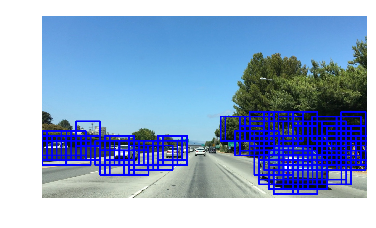

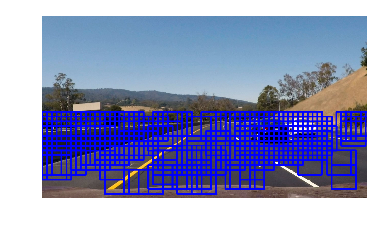

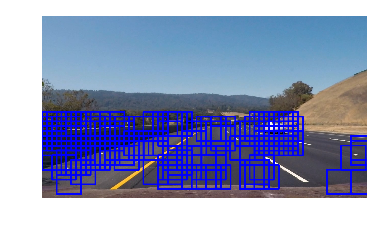

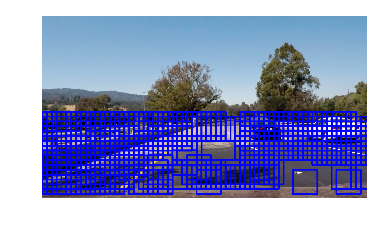

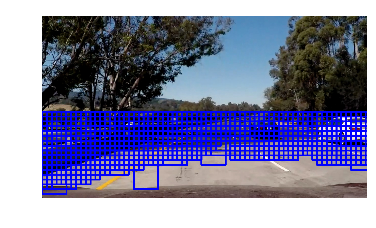

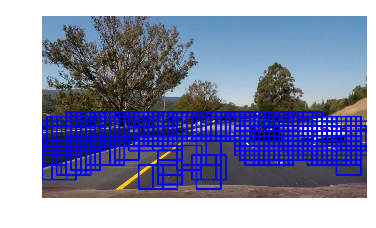

In [17]:
# Check the functions 
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial = 32
histbin = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
y_start_stop = [380, 660] # Min and max in y to search in slide_window()

for i in range(1, 7):
    img = cv2.imread('test_img/test' + str(i) + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    draw_image = np.copy(img)

    windows = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                           xy_window=(96, 96), xy_overlap=(0.8, 0.8))

    hot_windows = search_windows(img, windows, clf, X_scaler, color_space=colorspace, 
                                 spatial_size=(spatial, spatial), hist_bins=histbin, 
                                 orient=orient, pix_per_cell=pix_per_cell, 
                                 cell_per_block=cell_per_block, 
                                 hog_channel=hog_channel)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    fig = plt.figure(figsize=(12, 8))
    plt.subplot(3, 2, i)
    plt.imshow(window_img)
    plt.axis('off')

In [18]:
def find_cars(img, ystart, ystop, scale, clf, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):    
    draw_img = np.copy(img)
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = clf.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img

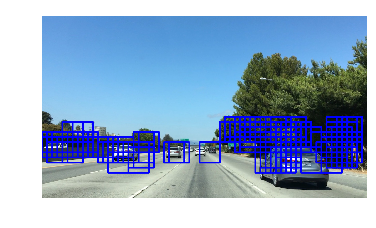

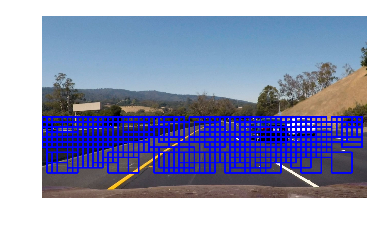

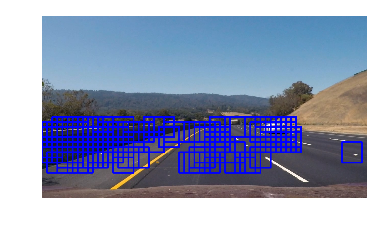

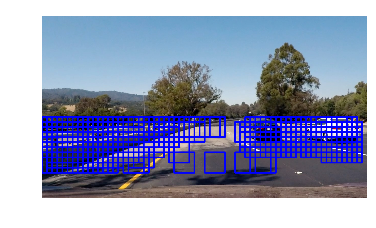

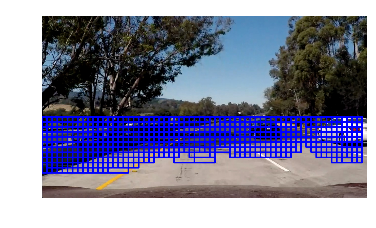

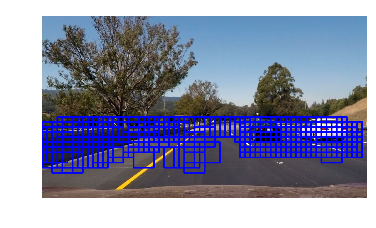

In [19]:
# Check the functions 
ystart = 400
ystop = 656
scale = 1.25

# Read in test images
for i in range(1, 7):
    img = cv2.imread('test_img/test' + str(i) + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    out_img = find_cars(img, ystart, ystop, scale, clf, X_scaler, orient, pix_per_cell, 
                    cell_per_block, spatial_size=(32,32), hist_bins=32)                   

    fig = plt.figure(figsize=(12, 8))
    plt.subplot(3, 2, i)
    plt.imshow(out_img)
    plt.axis('off')

In [20]:
from scipy.ndimage.measurements import label

def find_cars(img, ystart, ystop, scale, clf, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):    
    draw_img = np.copy(img)
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = clf.predict(test_features)
          
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                heat[(ytop_draw+ystart):(ytop_draw+win_draw+ystart), xbox_left:(xbox_left+win_draw)] += 1

    heat[heat <= 1] = 0            
#    heatmap = np.clip(heat, 0, 255)
    labels = label(heat)
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        w = np.max(nonzerox)-np.min(nonzerox)
        h = np.max(nonzeroy)-np.min(nonzeroy)
        #if (75 < w < 250) & (25 < h < 150):
        cv2.rectangle(draw_img, bbox[0], bbox[1], (0,0,255), 6) 
    return draw_img

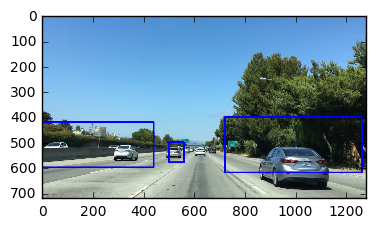

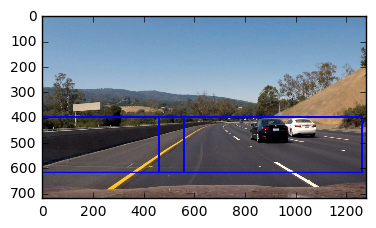

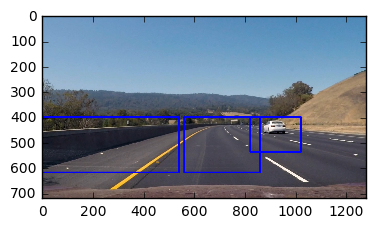

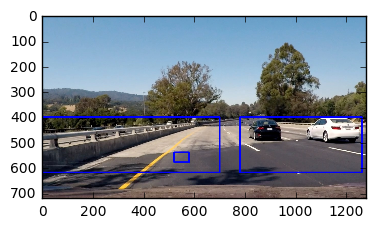

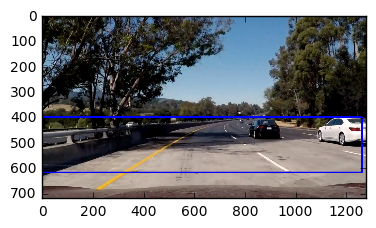

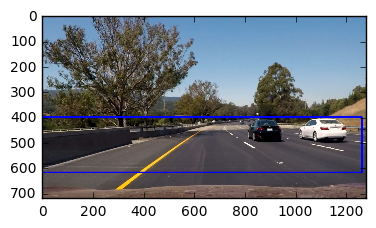

In [21]:
ystart = 400
ystop = 656

# Read in test images
for i in range(1, 7):
    img = cv2.imread('test_img/test' + str(i) + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    out_img = find_cars(img, ystart, ystop, scale, clf, X_scaler, orient, pix_per_cell, 
                    cell_per_block, spatial_size=(32,32), hist_bins=32)                   

    fig = plt.figure(figsize=(12, 8))
    plt.subplot(3, 2, i)
    plt.imshow(out_img)